# pull in the data

In [1]:
#import some relative libraries
import pandas as pd
import numpy as np
import math
from numbers import Number
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline




In [2]:
#load in the data from an excel file and save in a pandas dataset
#preview the data
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

# Initial data understading and preperation

In [3]:
#check for data types and see if information is missing
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We can see that no instances are missing or NAN values, and that all variables 
are continuous except for the target variable 

In [4]:
#column information and dataset taken from
#https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
#column information
"""
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
"""

'\n1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\n2.) Perimeter (P): Bean circumference is defined as the length of its border.\n3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.\n4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.\n5.) Aspect ratio (K): Defines the relationship between L and l.\n6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.\n7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\n8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.\n9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\n10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.\n11.)Roundness (R): Calculated with the 

In [5]:
bean_df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [6]:
#check out the target class
bean_df['Class'].value_counts(normalize=True)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

Here we can see that the 'DERMASON' bean is the most commonly represented out of the 7 bean types.
This specific bean will become our target class, and we will try to predict if a bean is or isn't
a Dermason bean based off of other present dependent vartiables. 
so we will be running

# feature engineering


Currently the target variable column shows which of the 7 beans each row is. We want to create a new target varable column showing if an instance is or is not a Dermason bean.

In [7]:
#lambda function creating column showing if instance is or isn't the target bean
bean_df['Dermason']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 
bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  \
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER   
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER   
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER   
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER   
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER   

   Dermason  
0         0  
1         0  
2         0  
3         0  
4         0

In [8]:
#check to make sure this new Dermason column proportion matches the above proportion
bean_df['Dermason'].value_counts(normalize=True)

Dermason
0    0.739475
1    0.260525
Name: proportion, dtype: float64

The proportion matches but is only a quarter of the dataset. This may lead to underrepresentation problems in the classification down the line. Potential solutions are using SMOTE to artifically increase there Dermason (denoted by '1') frequency, and random undersampling of the '0' instances to bring the ratio closer to 50-50.

# Splitting the data up into train and test subsets

In [9]:
#assign the independent variable columns
X= bean_df.drop(['Dermason','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

# build a vanilla base line model and evaluate 

In [10]:
#start out with logistic regression as a baseline model 

#lr1 is logistic regression #1
#initialize the model
lr1 = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr1.fit(X_train, y_train)
#make predictions with the model
y_pred_lr1= lr1.predict(X_train)

print(classification_report(y_train, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249



In [11]:
#do some cross-validation to see how the model reacts to data it has not been trained on
cv_results = cross_val_score(lr1, X_train, y_train, cv= 6)
print('An array of baseline model accuracy results across (6) cross Validations:')
print(cv_results)
print()
print('The average accuracy score of those 6 cross-validations:')
print(cv_results.mean())

An array of baseline model accuracy results across (6) cross Validations:
[0.91283056 0.92850147 0.92850147 0.92405683 0.91817736 0.92160706]

The average accuracy score of those 6 cross-validations:
0.9222791251431838


On average this model accurately classifies 92.22% of the bean instances.

To help compare this model to future versions of models I will make a class to help store models and their cross-validation scores.

In [12]:
#works
class ModelWithCV():

    #call out the values
    def __init__(self, model, model_name, X, y, cv_now= True):
        #for the model and data
        self.model= model
        self.name= model_name
        self.X= X
        self.y= y
        #for the cross-validation results
        self.cv_results= None
        self.cv_mean= None
        self.cv_median= None
        self.cv_std= None
        # cross-validation activation
        if cv_now:
            self.cross_validate()

    #perform cross-validation and return the results
    def cross_validate(self, X= None, y= None, kfolds=10):
        """
        Here X, y, and kfolds are optional arguments.
        If not specifically called out, X and y will default to object values,
        and kfolds will default to 10.
        """
        #assigns the X and y values
        cv_X= X if X else self.X
        cv_y= y if y else self.y

        #assigns the cross-validation results
        self.cv_results= cross_val_score(self.model, cv_X, cv_y, cv= kfolds)
        self.cv_mean= np.mean(self.cv_results)
        self.cv_medain= np.median(self.cv_results)
        self.cv_std= np.std(self.cv_results)

    #prints the cross-validation summary
    def print_cv_summary(self):
        cv_summary= (
            f"CV results for {self.name} model: {self.cv_mean:.5f} +- {self.cv_std:.5f} accuracy")
        print(cv_summary)

    #plots the cross-validation values
    def plot_cv(self, ax):
        ax.set_title(f"CV results for '{self.name}' Model")
        sns.violinplot(y= self.cv_results, ax= ax, bw_method= .4)
        sns.swarmplot(y= self.cv_results, color= 'red', size= 10,
                      alpha= .8, ax= ax)

        return ax 

In [13]:
#works
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

class ModelWithCV():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.cv_specificity_mean = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        """
        Perform cross-validation. Optionally, X, y, and kfolds can be specified.
        X and y default to the instance values, and kfolds defaults to 10.
        """
        # Use provided or instance values for X and y
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to ensure proper indexing
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Perform cross-validation for accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Calculate the specificity for each fold using StratifiedKFold
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores = []

        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]

            # Fit model and make predictions
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            specificity = tn / (tn + fp)  # Specificity calculation
            specificity_scores.append(specificity)

        # Store the average specificity
        self.cv_specificity_mean = np.mean(specificity_scores)

    def print_cv_summary(self):
        cv_summary = (
            f"CV results for {self.name} model: {self.cv_mean:.5f} +- {self.cv_std:.5f} accuracy\n"
            f"Average specificity: {self.cv_specificity_mean:.5f}")
        print(cv_summary)

    def plot_cv(self, ax):
        ax.set_title(f"CV results for '{self.name}' Model")
        sns.violinplot(y=self.cv_results, ax=ax, bw_method=.4)
        sns.swarmplot(y=self.cv_results, color='red', size=10, alpha=.8, ax=ax)
        return ax


In [14]:
#works
class ModelWithCV():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.cv_specificity_mean = None
        self.avg_conf_matrix = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        """
        Perform cross-validation. Optionally, X, y, and kfolds can be specified.
        X and y default to the instance values, and kfolds defaults to 10.
        """
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to avoid indexing issues with pandas
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Perform cross-validation for accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Initialize variables for confusion matrix accumulation
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores = []
        total_conf_matrix = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification

        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]

            # Fit model and make predictions
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            # Compute specificity
            specificity = TN / (TN + FP)  # Specificity calculation
            specificity_scores.append(specificity)

        # Store the average specificity
        self.cv_specificity_mean = np.mean(specificity_scores)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary = (
            f"CV results for {self.name} model: {self.cv_mean:.5f} +- {self.cv_std:.5f} accuracy\n"
            f"Average specificity: {self.cv_specificity_mean:.5f}")
        print(cv_summary)

    def plot_cv(self, ax):
        ax.set_title(f"CV results for '{self.name}' Model")
        sns.violinplot(y=self.cv_results, ax=ax, bw_method=.4)
        sns.swarmplot(y=self.cv_results, color='red', size=10, alpha=.8, ax=ax)
        return ax

    def plot_avg_conf_matrix(self):
        """
        Plot the average confusion matrix using ConfusionMatrixDisplay.
        """
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run cross-validation first.")


## print the baseline model results

In [15]:
#instantiate the class
baseline_model_results= ModelWithCV(model= lr1,
                                    model_name= 'Base_LR_Model',
                                    X= X_train,
                                    y= y_train)

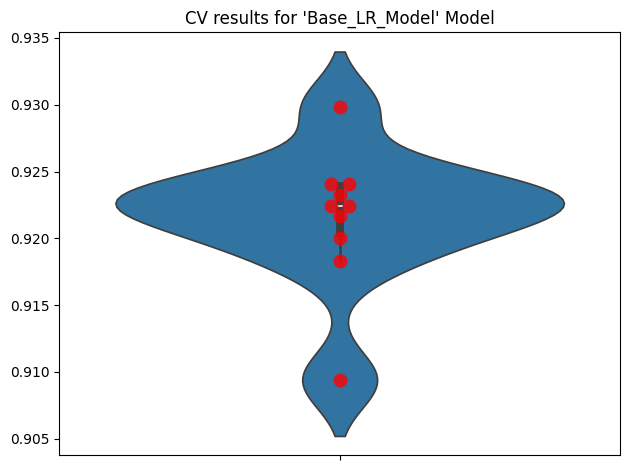

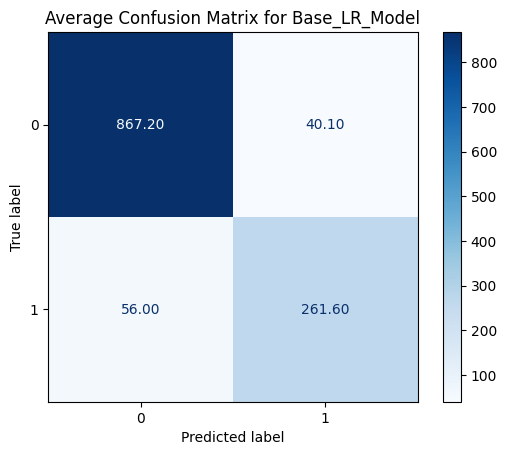

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580


In [20]:
#plot the results
fig, ax= plt.subplots()

ax1= baseline_model_results.plot_cv(ax)
plt.tight_layout()

ax2= baseline_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()

# Second Model Iteration Base Standardized

## standardize the training data

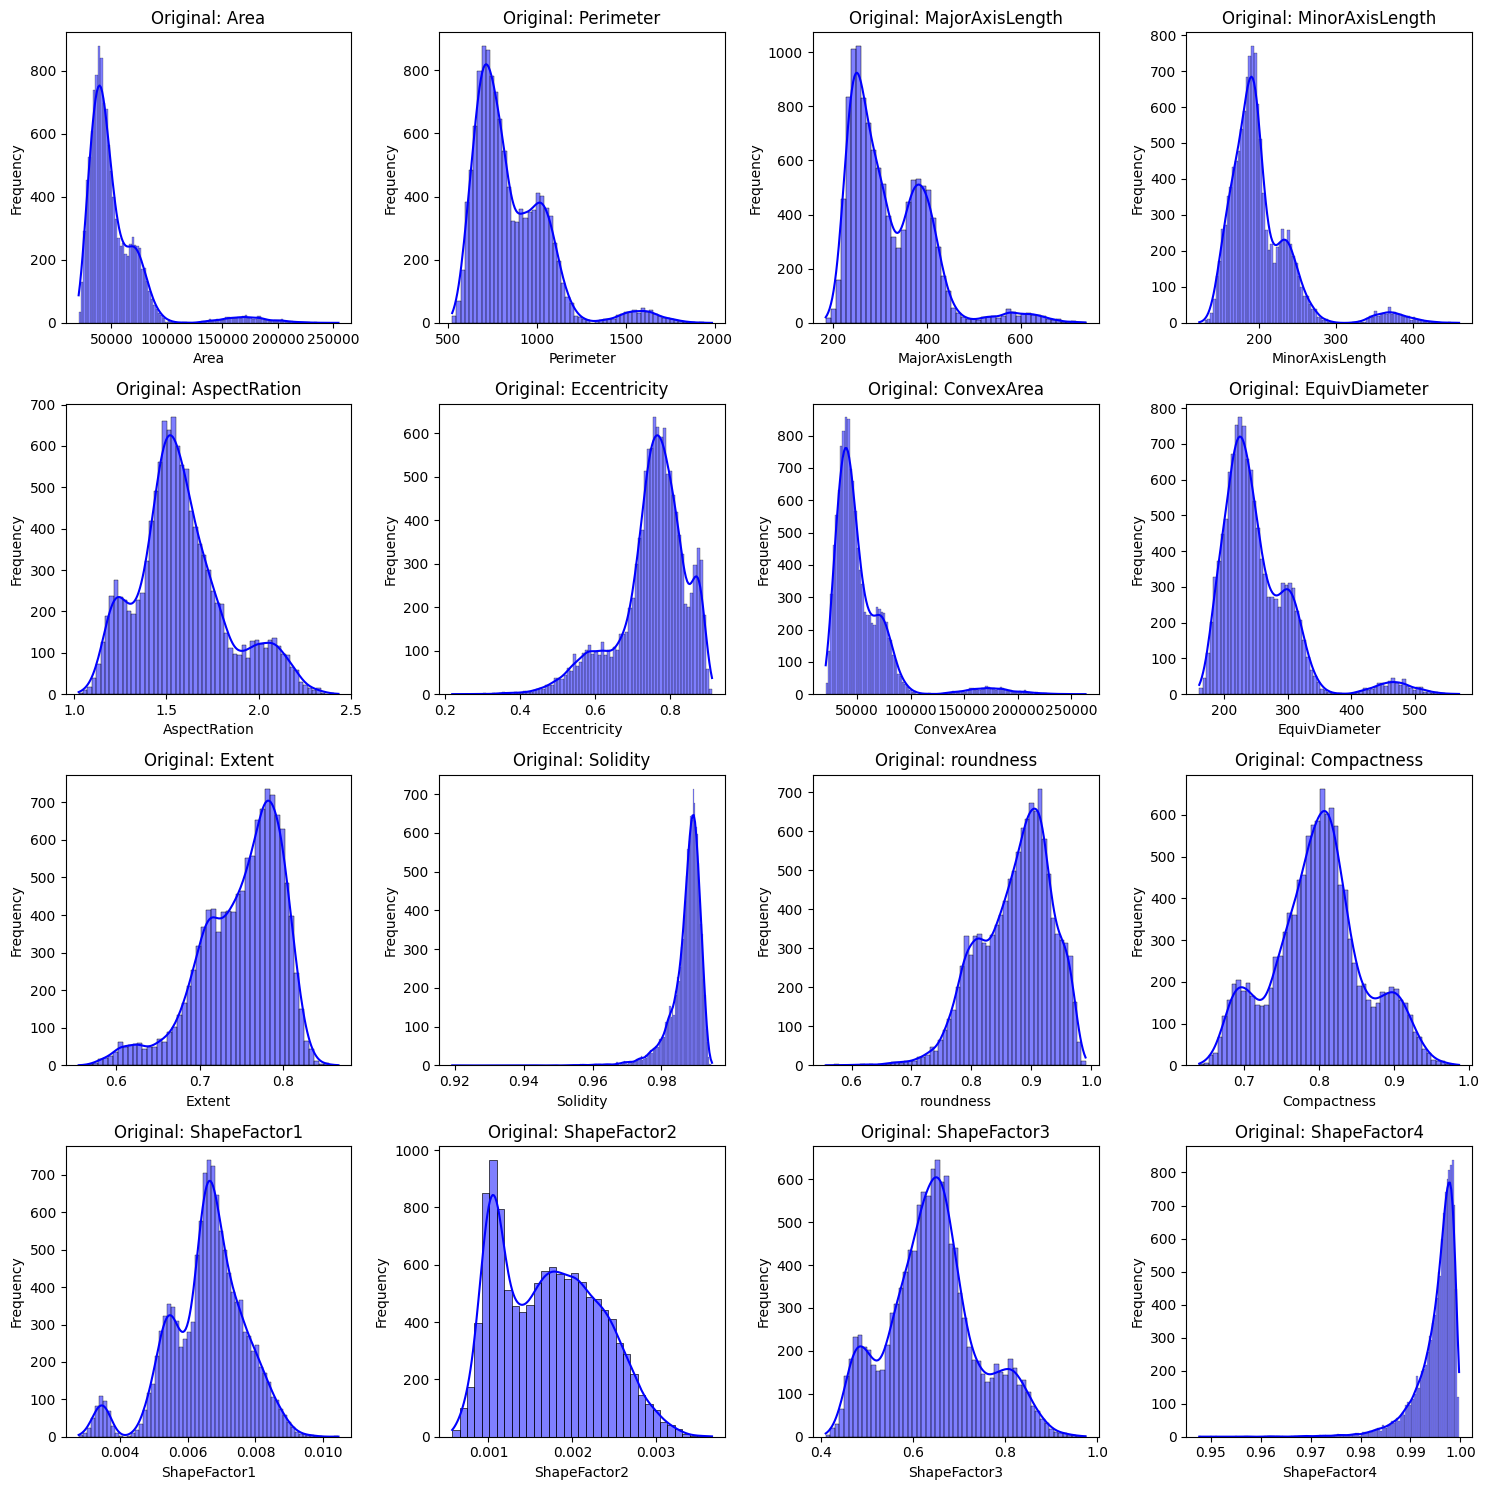

In [21]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
#make a function to standardize all the data
def Scale_It(df):
    #initialize the scaler
    scaler = StandardScaler()
    #fit the scaler and transform the data
    scaled_data = scaler.fit_transform(df)
    #turn the scaled data back into a dataframe
    df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

    return df_scaled

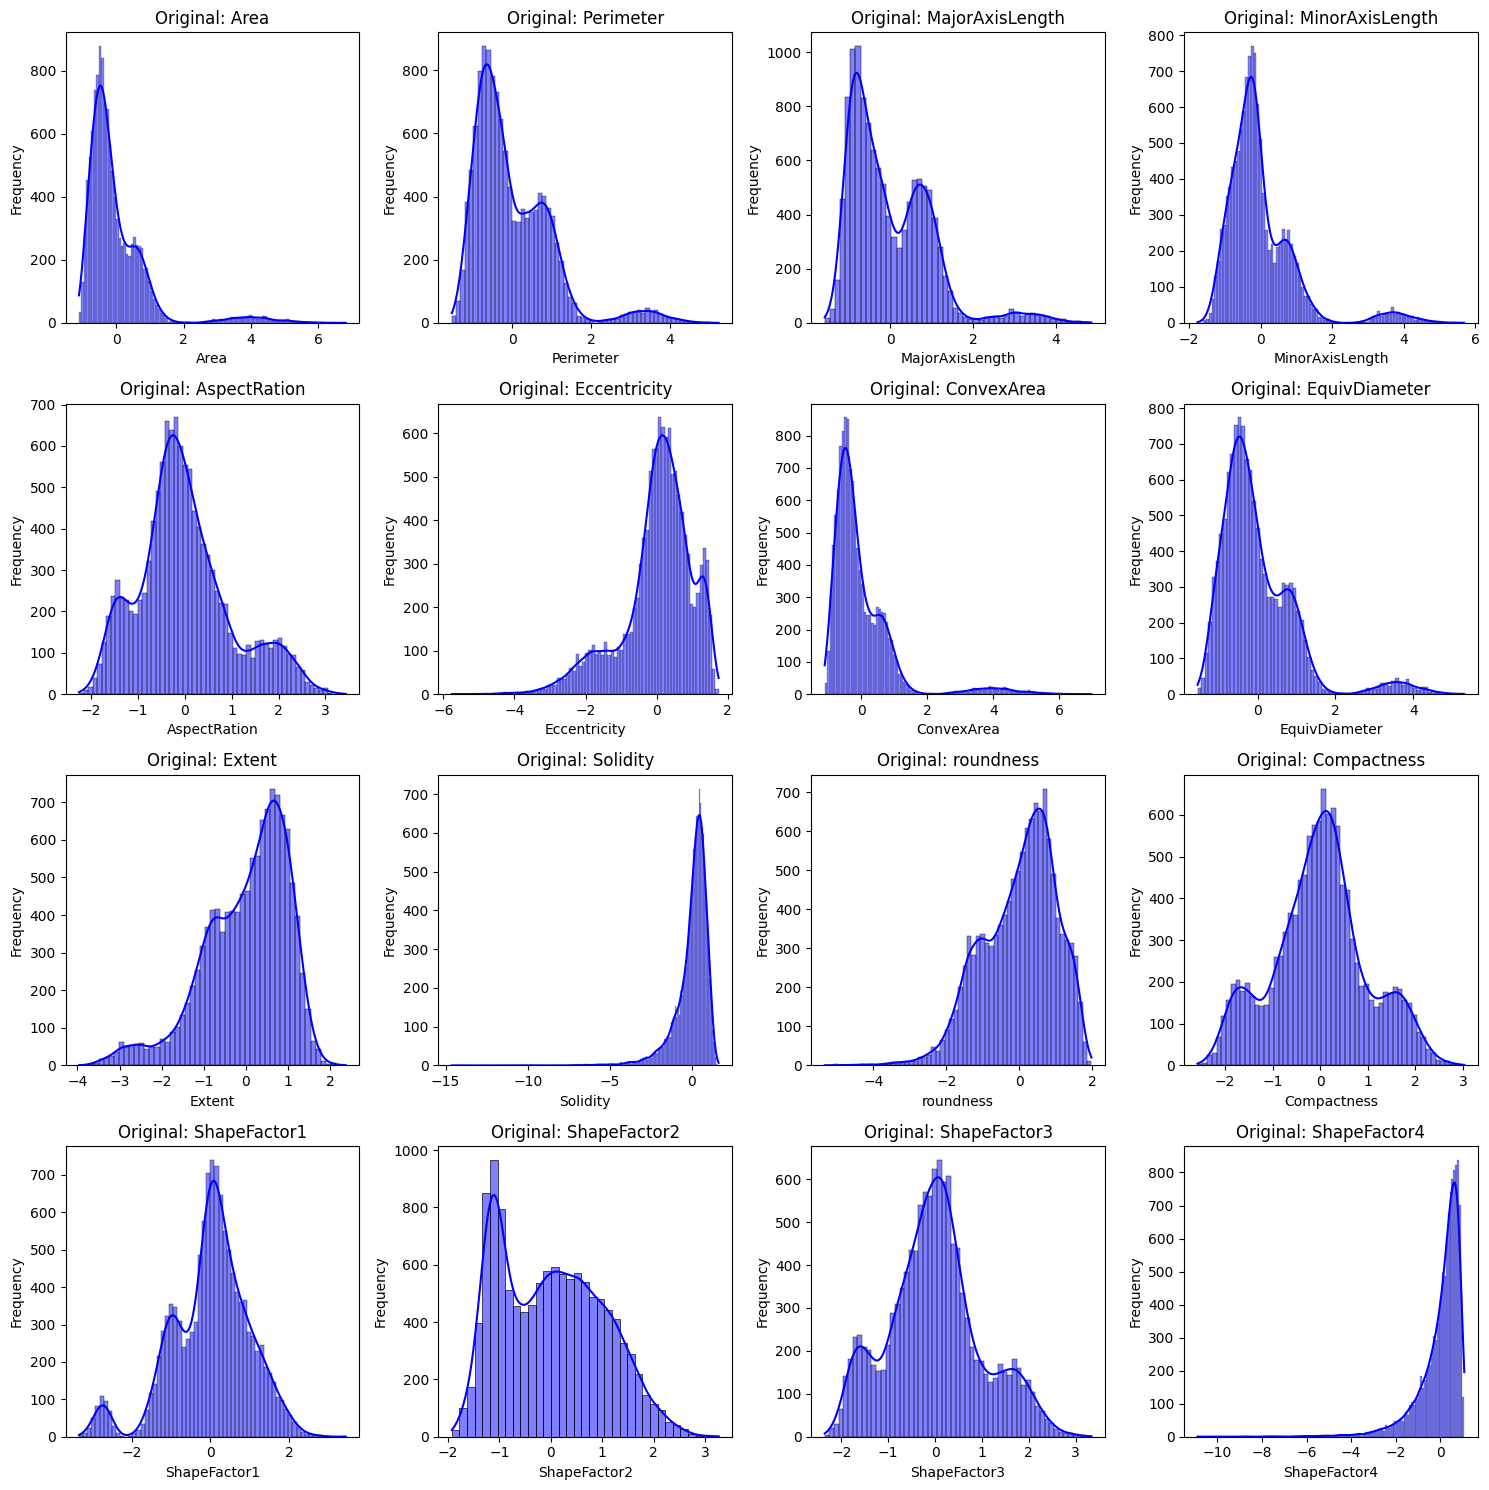

In [23]:
#scale the training data
#plot the new standardized data to check it out
X_train_Scaled= Scale_It(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Scaled.columns):
    sns.histplot(X_train_Scaled[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the standardized model and evaluate

In [25]:
#lr_stand is the standardized model
#initialize the model
lr_stand = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_stand.fit(X_train_Scaled, y_train)
#make predictions with the model
y_pred_lr_stand= lr_stand.predict(X_train_Scaled)

#compare the classification report to the previous model
print('Base model classification report:')
print(classification_report(y_train, y_pred_lr1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_stand))

Base model classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249



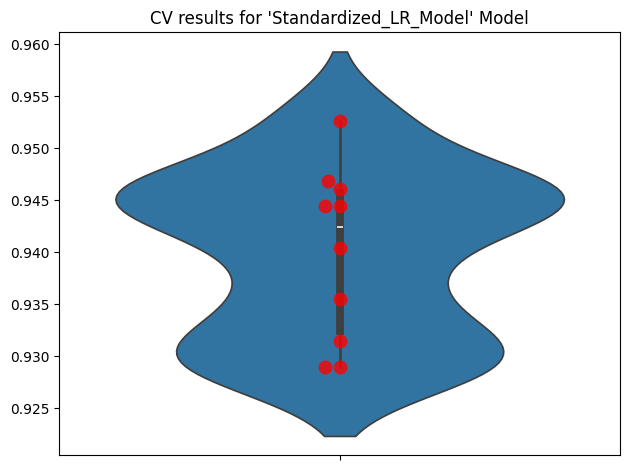

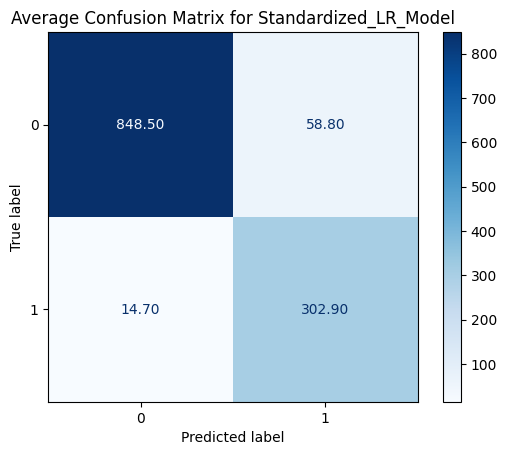

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519


In [26]:
#instantiate the class
Stanrdardized_model_results= ModelWithCV(model= lr_stand,
                                    model_name= 'Standardized_LR_Model',
                                    X= X_train_Scaled,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Stanrdardized_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Stanrdardized_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()

Mixed bag between improvement and not, accuracy went up but specificity went down. Lets see if normalization helps

# Third Model Iteration normalize the data then standardize it 

## normalize the data

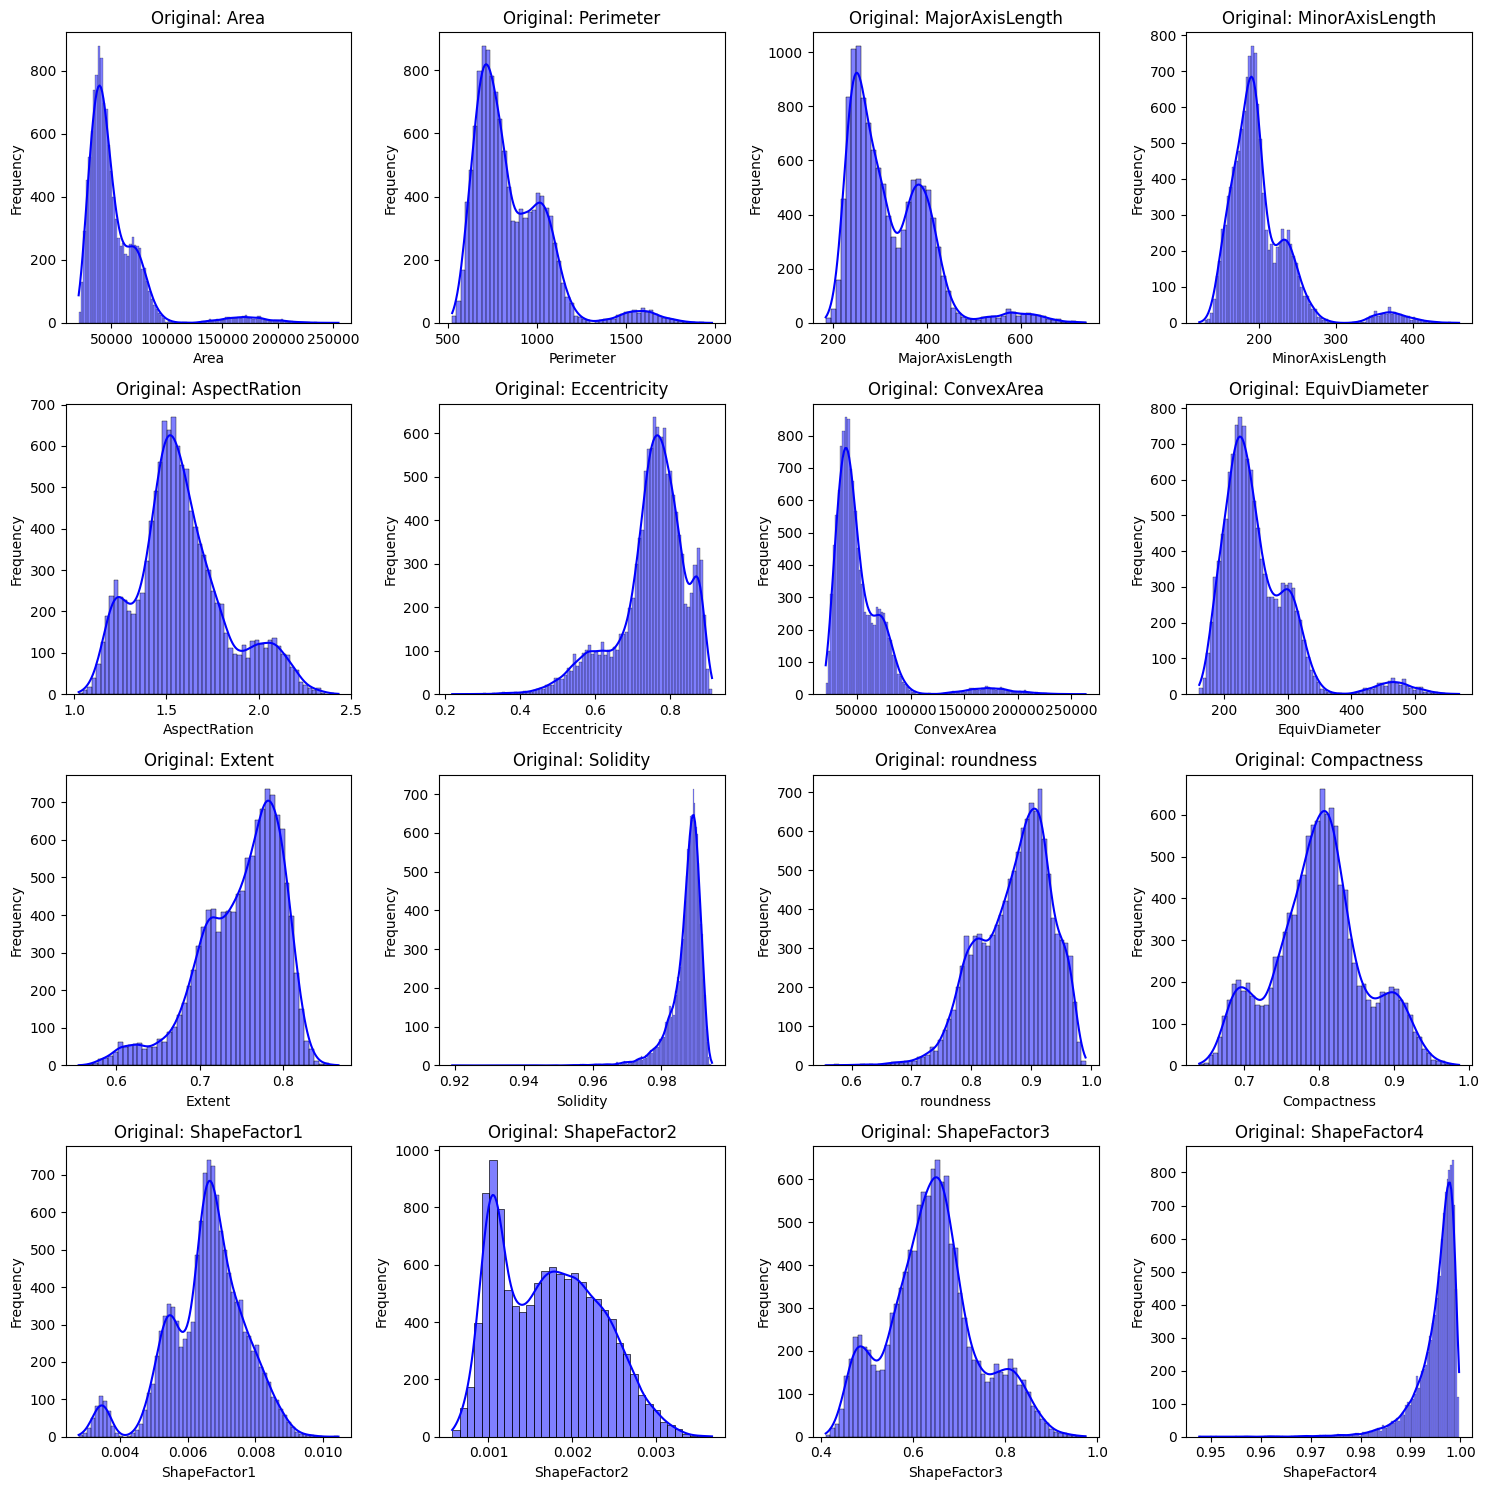

In [31]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
#make a function to normalize the skewed data

#list of columns to transform and the redistribution methods

#columns to log transform
LogT=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
      'EquivDiameter', 'ShapeFactor2']

#columns to Box-Cox transform
BoxCoxT= ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

#create a function to transform the columns in a data frame accordingly, or not
def TransShift(df):
    
    Redist= pd.DataFrame()
    
    for col in df.columns:

        if col in LogT:
            Redist[col]= np.log(df[col])
        elif col in BoxCoxT:
            shifted_col = df[col] + 1
            Redist[col], _ = stats.boxcox(shifted_col)
        else:
            Redist[col]= df[col]
    
    return Redist

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


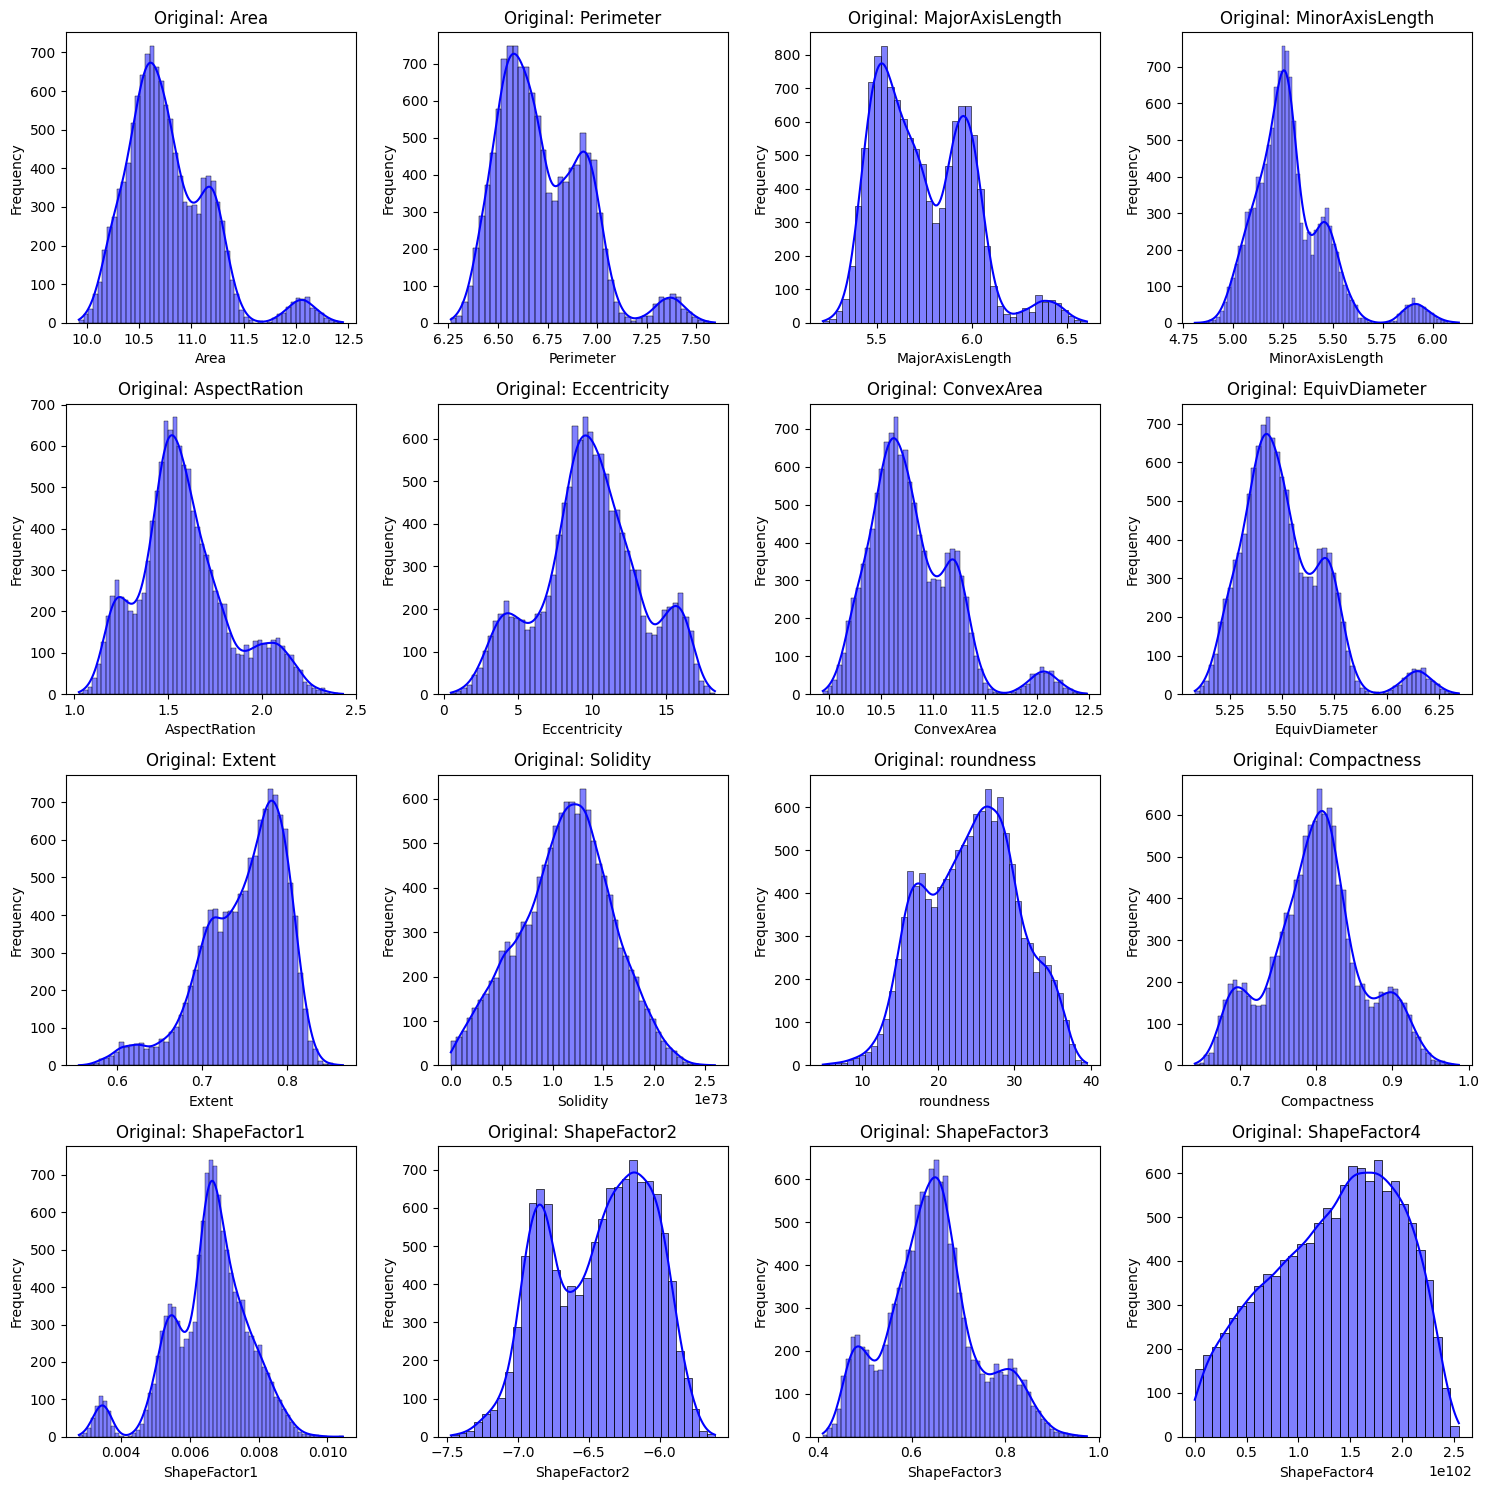

In [34]:
#normalize the training data
#plot the new normalized data distribution to check it out
X_train_Norm= TransShift(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Norm.columns):
    sns.histplot(X_train_Norm[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Standardize the data

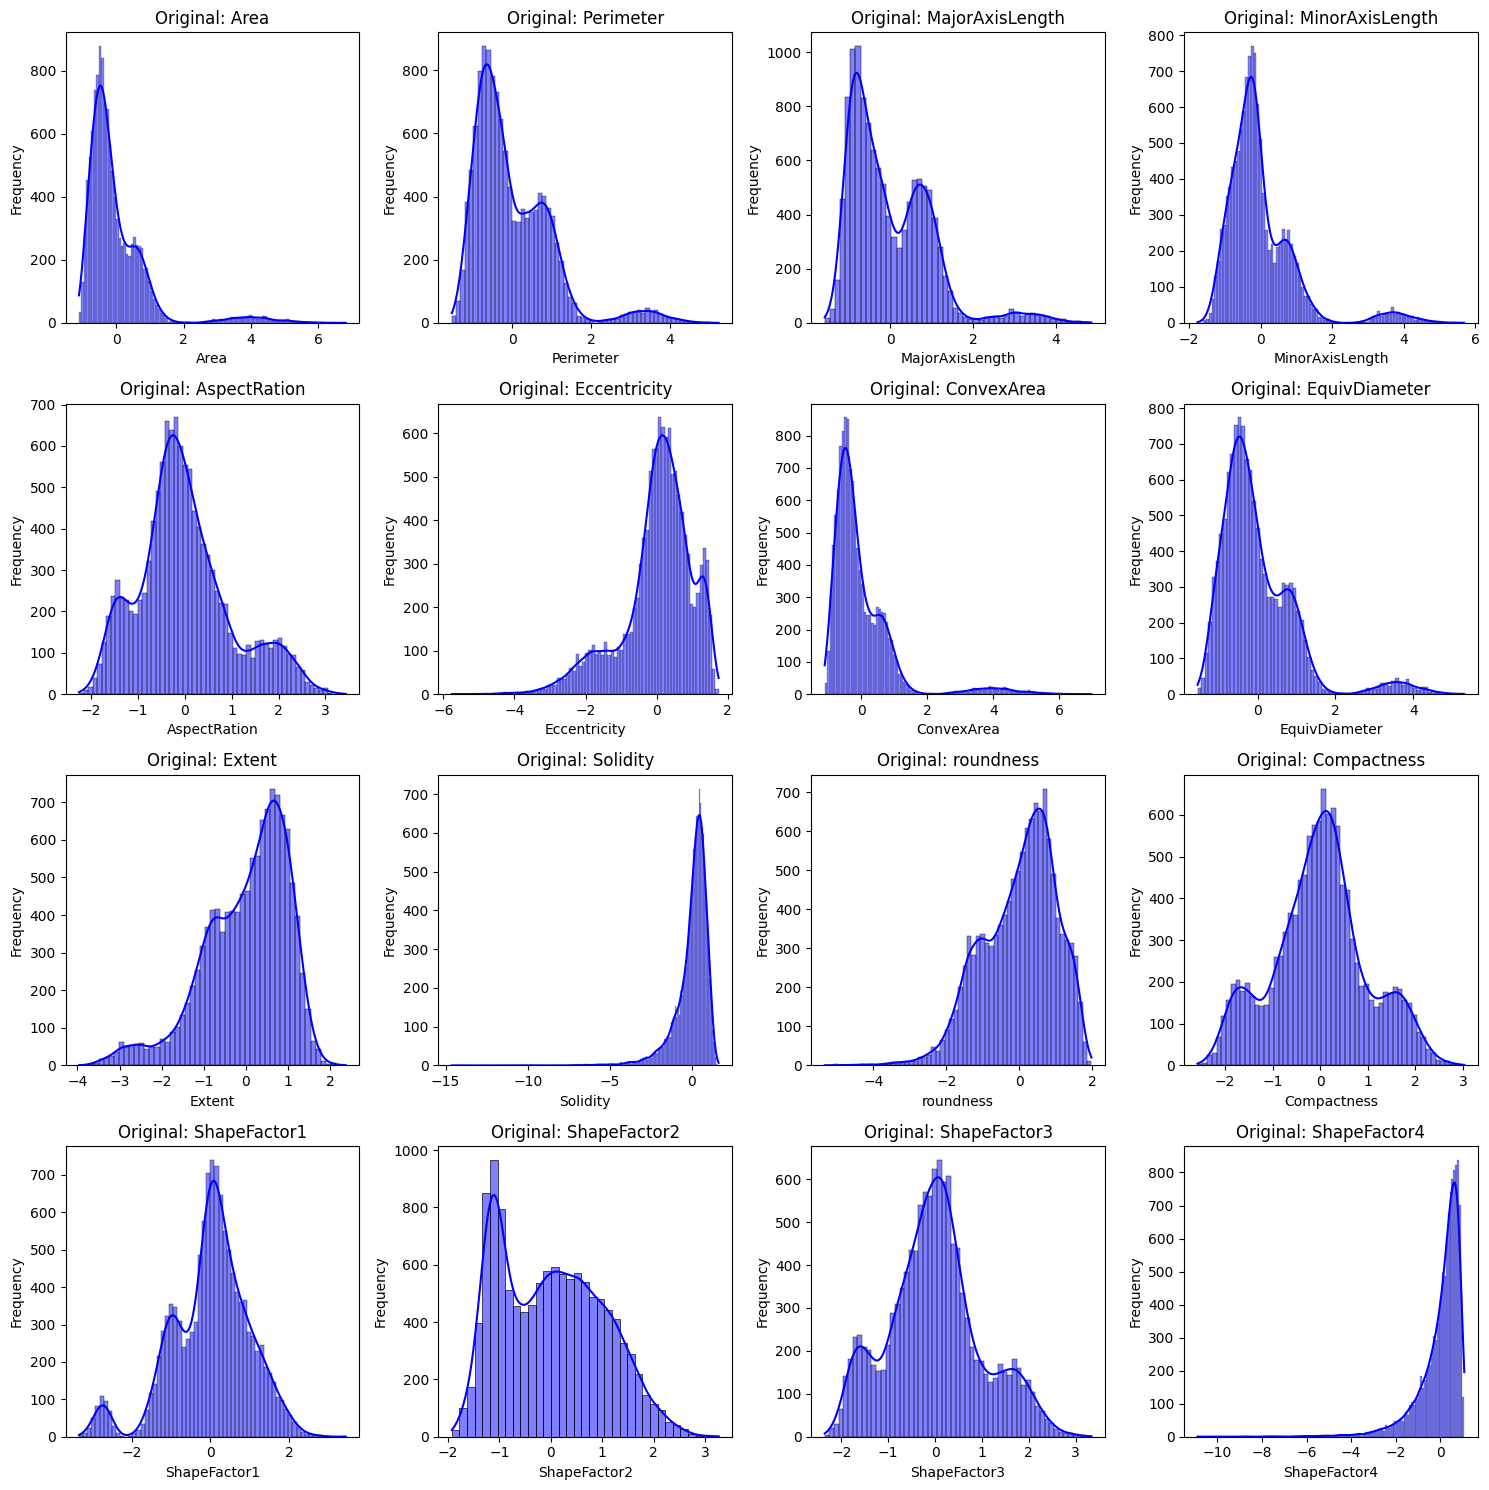

In [36]:
#scale the training data
#plot the new standardized data to check it out
X_train_Norm_Scaled= Scale_It(X_train_Norm)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Scaled.columns):
    sns.histplot(X_train_Scaled[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the normalized scaled model and evaluate

In [37]:
#lr_stand is the standardized model
#initialize the model
lr_norm_scaled = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_norm_scaled.fit(X_train_Norm_Scaled, y_train)
#make predictions with the model
y_pred_lr_norm_scaled= lr_norm_scaled.predict(X_train_Norm_Scaled)

#compare the classification report to the previous models
print('Base model classification report:')
print(classification_report(y_train, y_pred_lr1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_stand))
print()
print('Normalized and Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_norm_scaled))

Base model classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249


Normalized and Standardized model classification report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      9073
           1       0.64      0.99      0.78      3176

    accuracy                           0.86    

I believe this is hurting the model

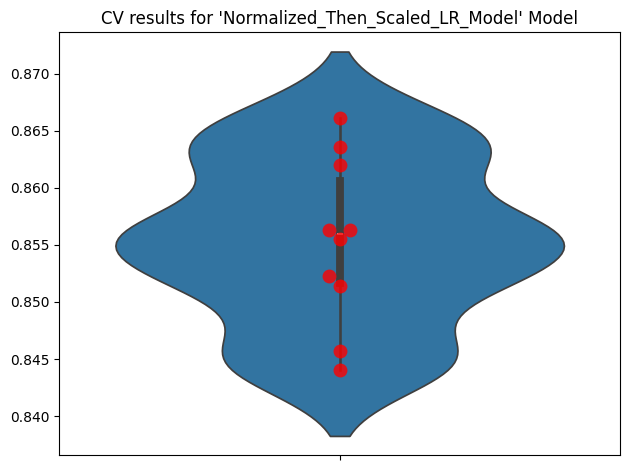

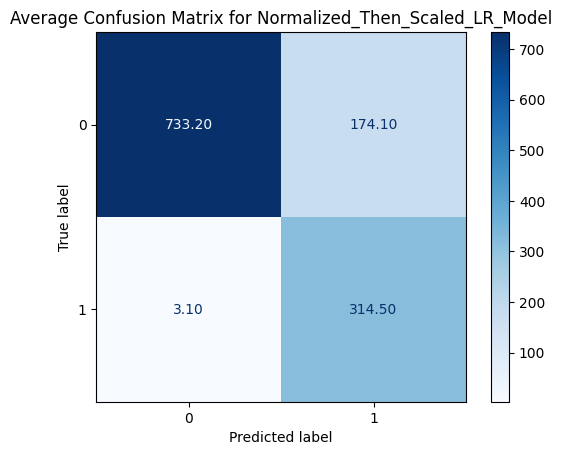

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519
CV results for Normalized_Then_Scaled_LR_Model model: 0.85534 +- 0.00689 accuracy
Average specificity: 0.80811


In [38]:
#instantiate the class
Norm_Scaled_model_results= ModelWithCV(model= lr_norm_scaled,
                                    model_name= 'Normalized_Then_Scaled_LR_Model',
                                    X= X_train_Norm_Scaled,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Norm_Scaled_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Norm_Scaled_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()
Norm_Scaled_model_results.print_cv_summary()

Both standardization and normalization have decreased both the specificity and accuracy performance from the baseline model. We should not use this.

# Fourth Model using min max scaler on Base model 

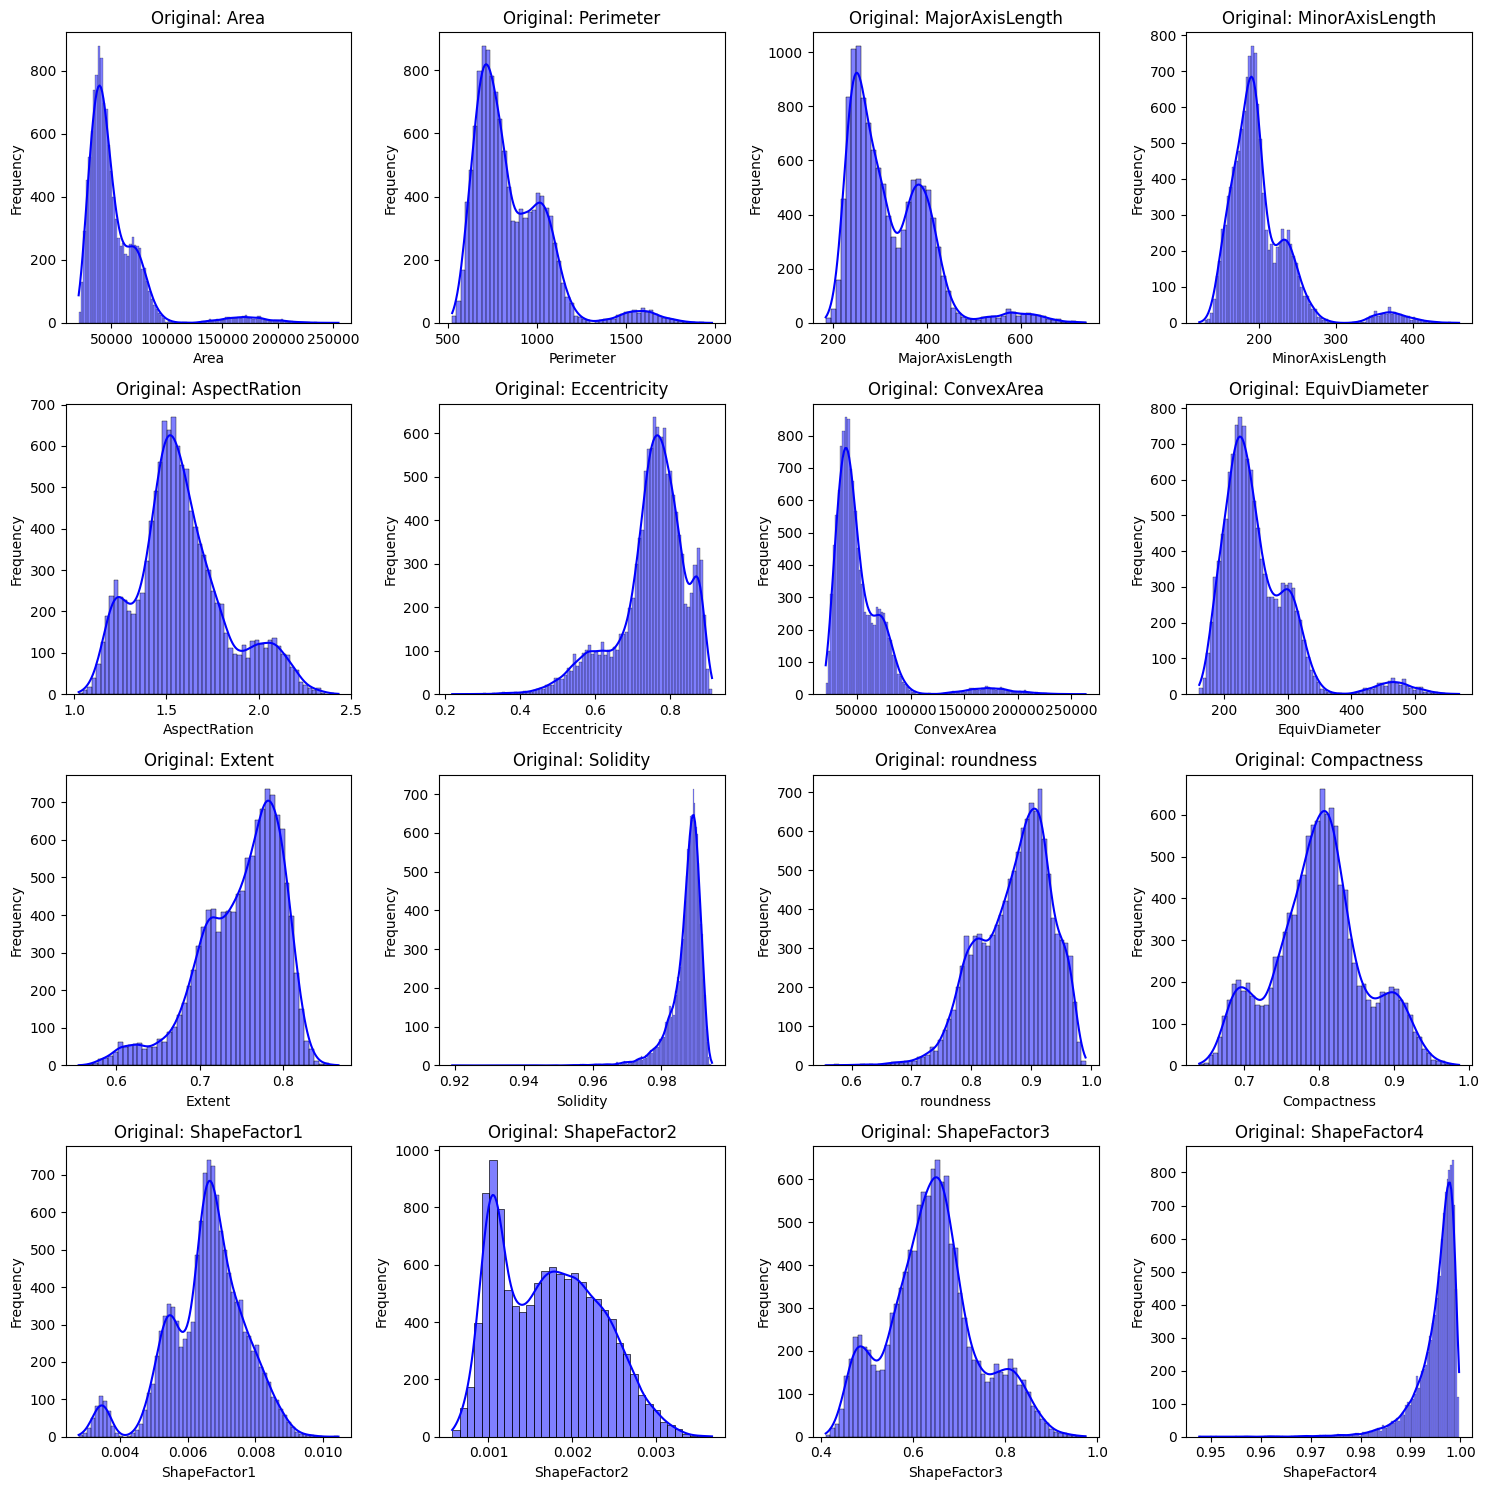

In [39]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
#make a function to normalize the data using min_max_scaler
def Min_Max_It(df):
    #initialize the scaler
    scaler = MinMaxScaler()
    #fit the scaler and transform the data
    normed_data = scaler.fit_transform(df)
    #turn the scaled data back into a dataframe
    df_normed = pd.DataFrame(normed_data, columns=df.columns)

    return df_normed

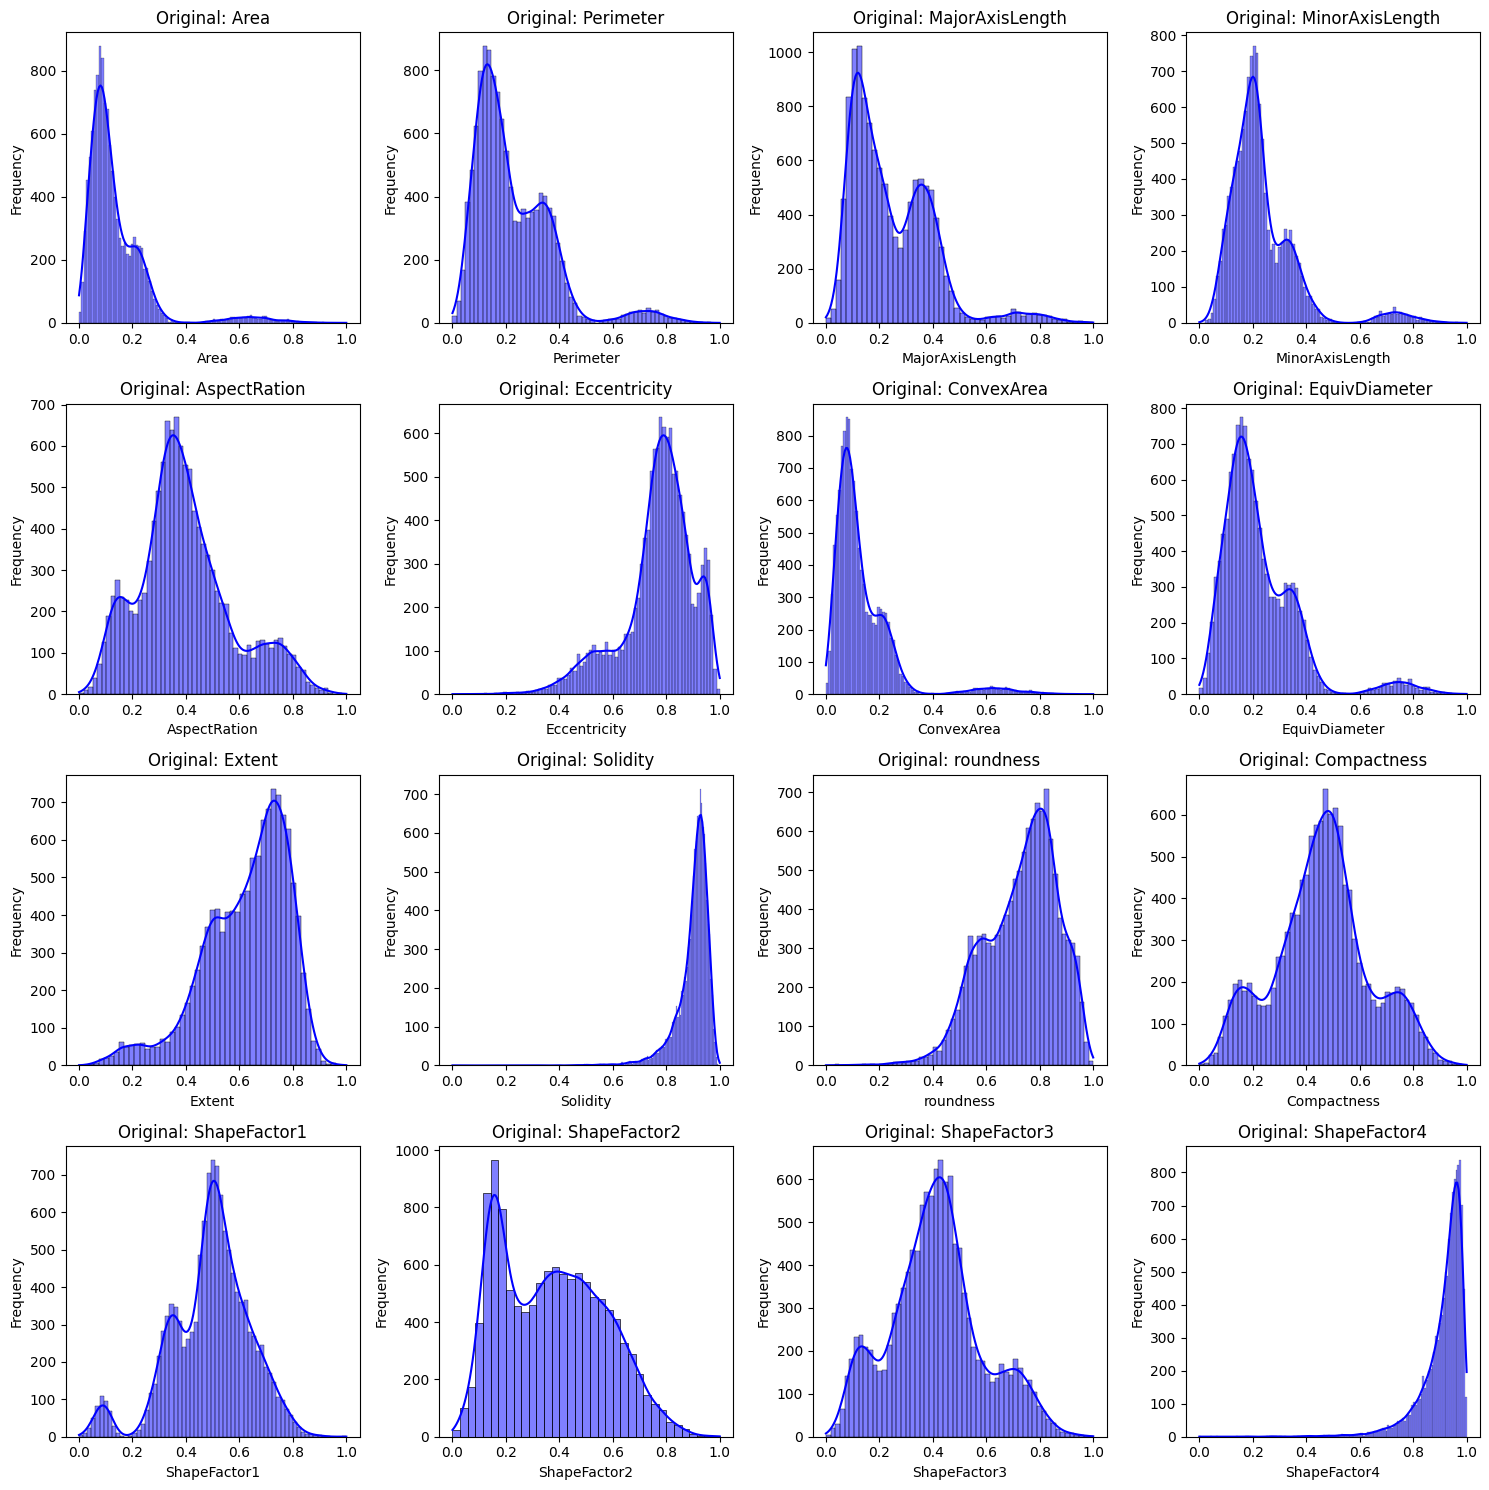

In [41]:
#normalize the training data via min max scaler
#plot the new normalized data distribution to check it out
X_train_MM= Min_Max_It(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM.columns):
    sns.histplot(X_train_MM[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the model and evaluate

In [42]:
#initialize the model
lr_MM = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_MM.fit(X_train_MM, y_train)
#make predictions with the model
y_pred_lr_MM= lr_MM.predict(X_train_MM)

#compare the classification report to the previous models
print('Base model classification report:')
print(classification_report(y_train, y_pred_lr1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_stand))
print()
print('Min_Max Normalized model classification report:')
print(classification_report(y_train, y_pred_lr_MM))

Base model classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249


Min_Max Normalized model classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
  

This min max normalization results in an almost across the board imporvement

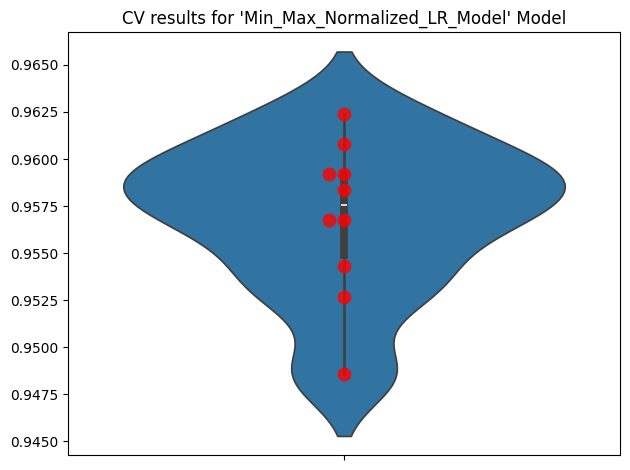

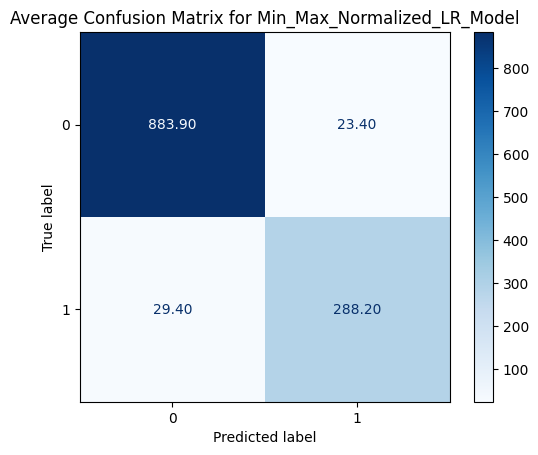

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519
CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421


In [43]:
#instantiate the class
MM_Norm_model_results= ModelWithCV(model= lr_MM,
                                    model_name= 'Min_Max_Normalized_LR_Model',
                                    X= X_train_MM,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= MM_Norm_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()
MM_Norm_model_results.print_cv_summary()

This min max normalized model is now the best performing model in terms of accuracy and specificty.

# Fifth model using standard scaler on Min Max Model

## standardize it

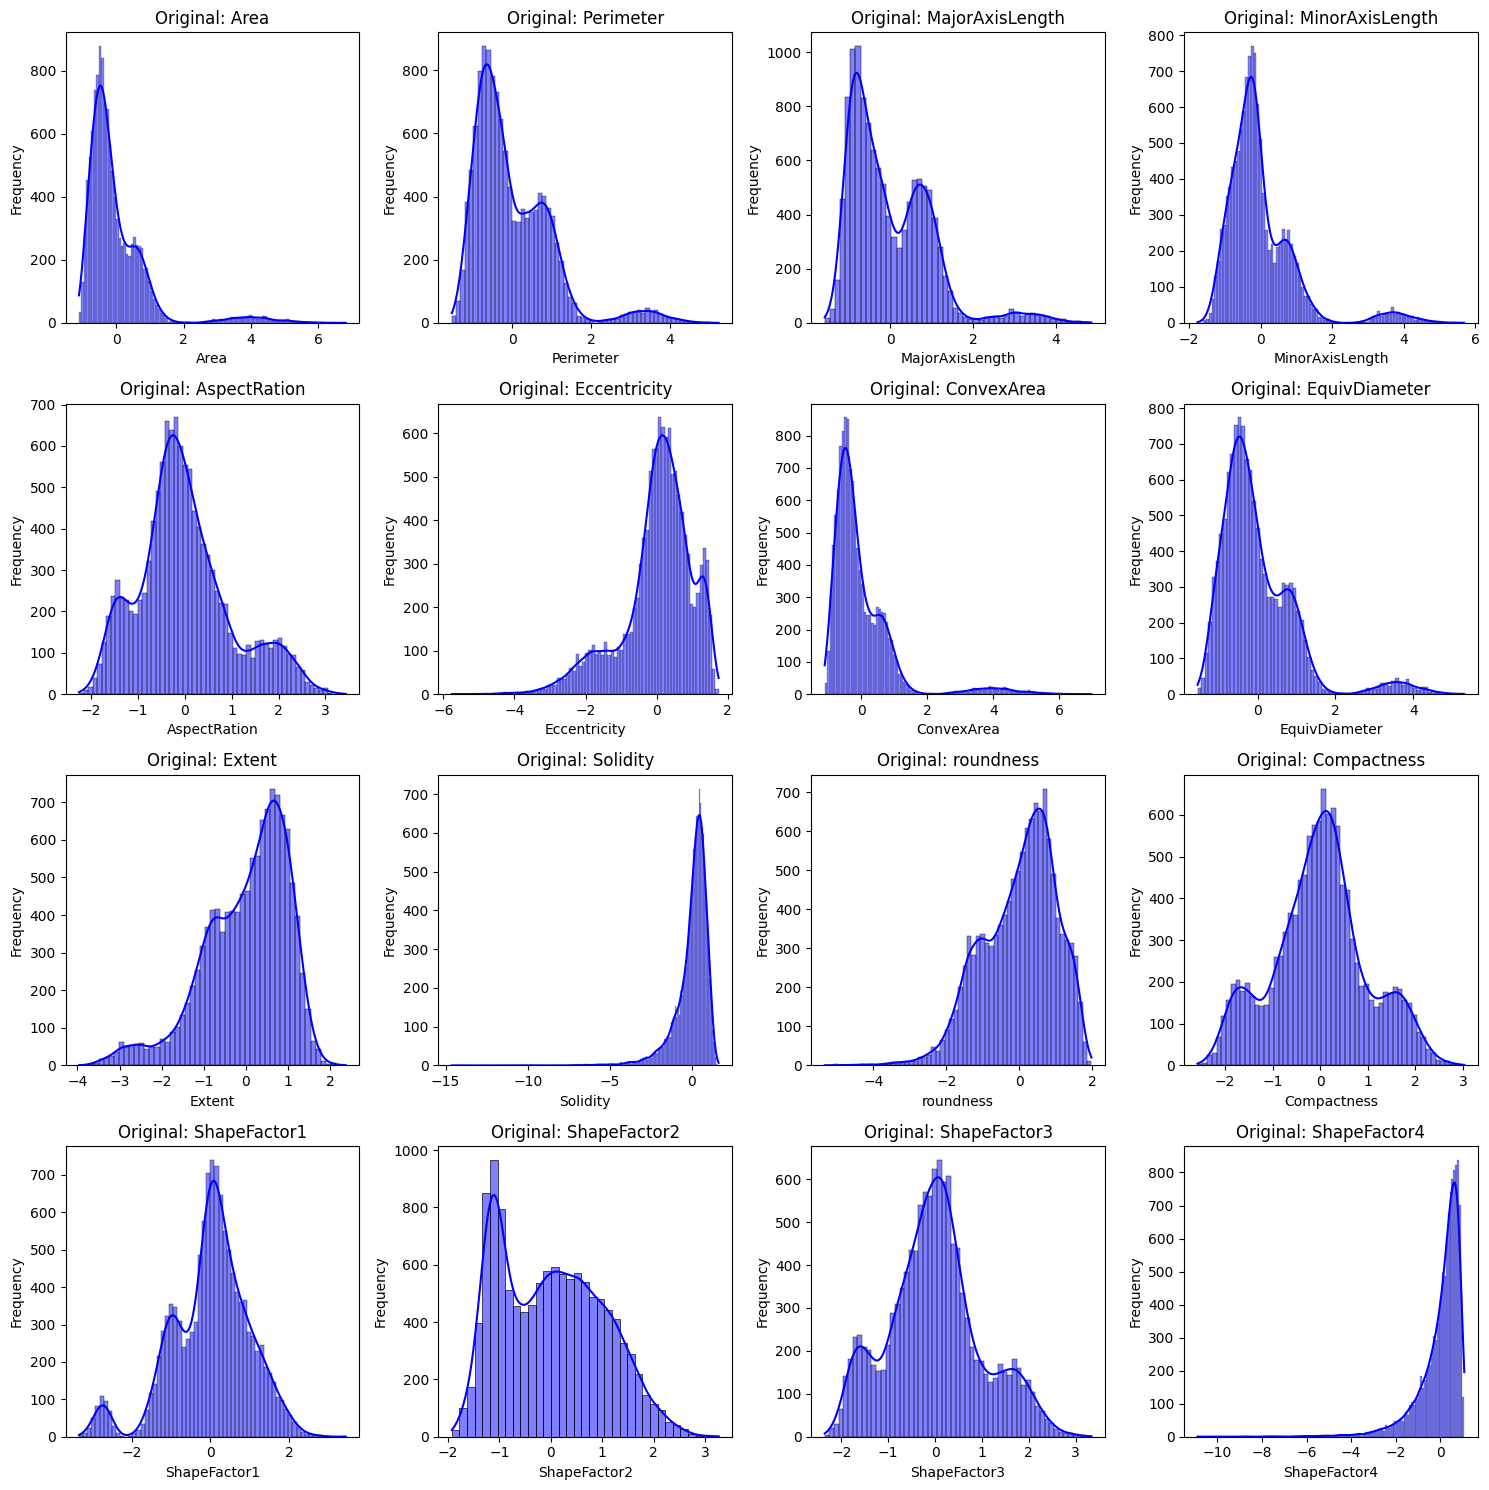

In [44]:
#scale the training data
#plot the new standardized data to check it out
X_train_MM_SC= Scale_It(X_train_MM)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM_SC.columns):
    sns.histplot(X_train_MM_SC[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the model and evaluate

In [45]:
#initialize the model
lr_MM_SC = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_MM_SC.fit(C, y_train)
#make predictions with the model
y_pred_lr_MM_SC= lr_MM_SC.predict(X_train_MM_SC)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Scaled model classification report:')
print(classification_report(y_train, y_pred_lr_MM_SC))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Scaled model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249



Mixed bag, some go up other success metrics go down

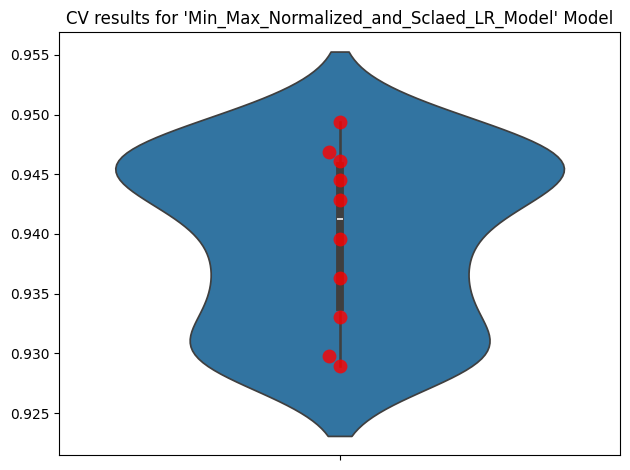

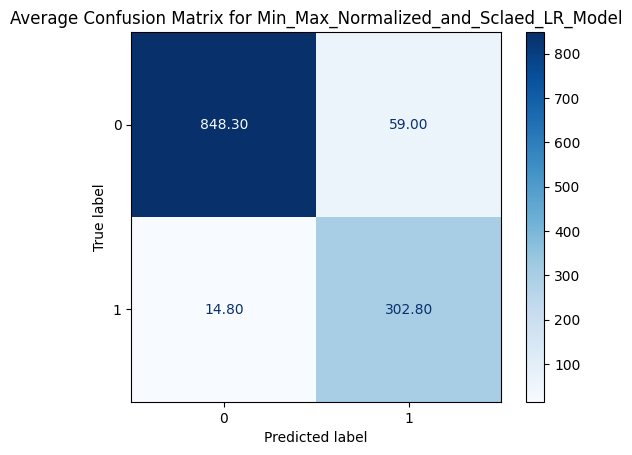

CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
CV results for Min_Max_Normalized_and_Sclaed_LR_Model model: 0.93975 +- 0.00699 accuracy
Average specificity: 0.93497


In [47]:
#instantiate the class
SC_MM_Norm_model_results= ModelWithCV(model= lr_MM_SC,
                                    model_name= 'Min_Max_Normalized_and_Sclaed_LR_Model',
                                    X= X_train_MM_SC,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= SC_MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= SC_MM_Norm_model_results.plot_avg_conf_matrix()


MM_Norm_model_results.print_cv_summary()
SC_MM_Norm_model_results.print_cv_summary()

Both accuracy and specificity went down. Let's scrap this newest iteration. 

# Sixth Model: Using Smote and Random Undersampling On Min Max Model

In [48]:
#create a function to SMOTE and Randomly undersample the dataset
def Smote_and_RandUndS(X, y):

        #resamplingby by applying SMOTE and random undersampling to balance the training data
        smote = SMOTE(sampling_strategy='auto', random_state=24)  
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

        # Create a pipeline that applies SMOTE and undersampling
        pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

        # Apply the resampling on the passed in data
        X_resampled, y_resampled = pipeline.fit_resample(X, y)

        return X_resampled, y_resampled

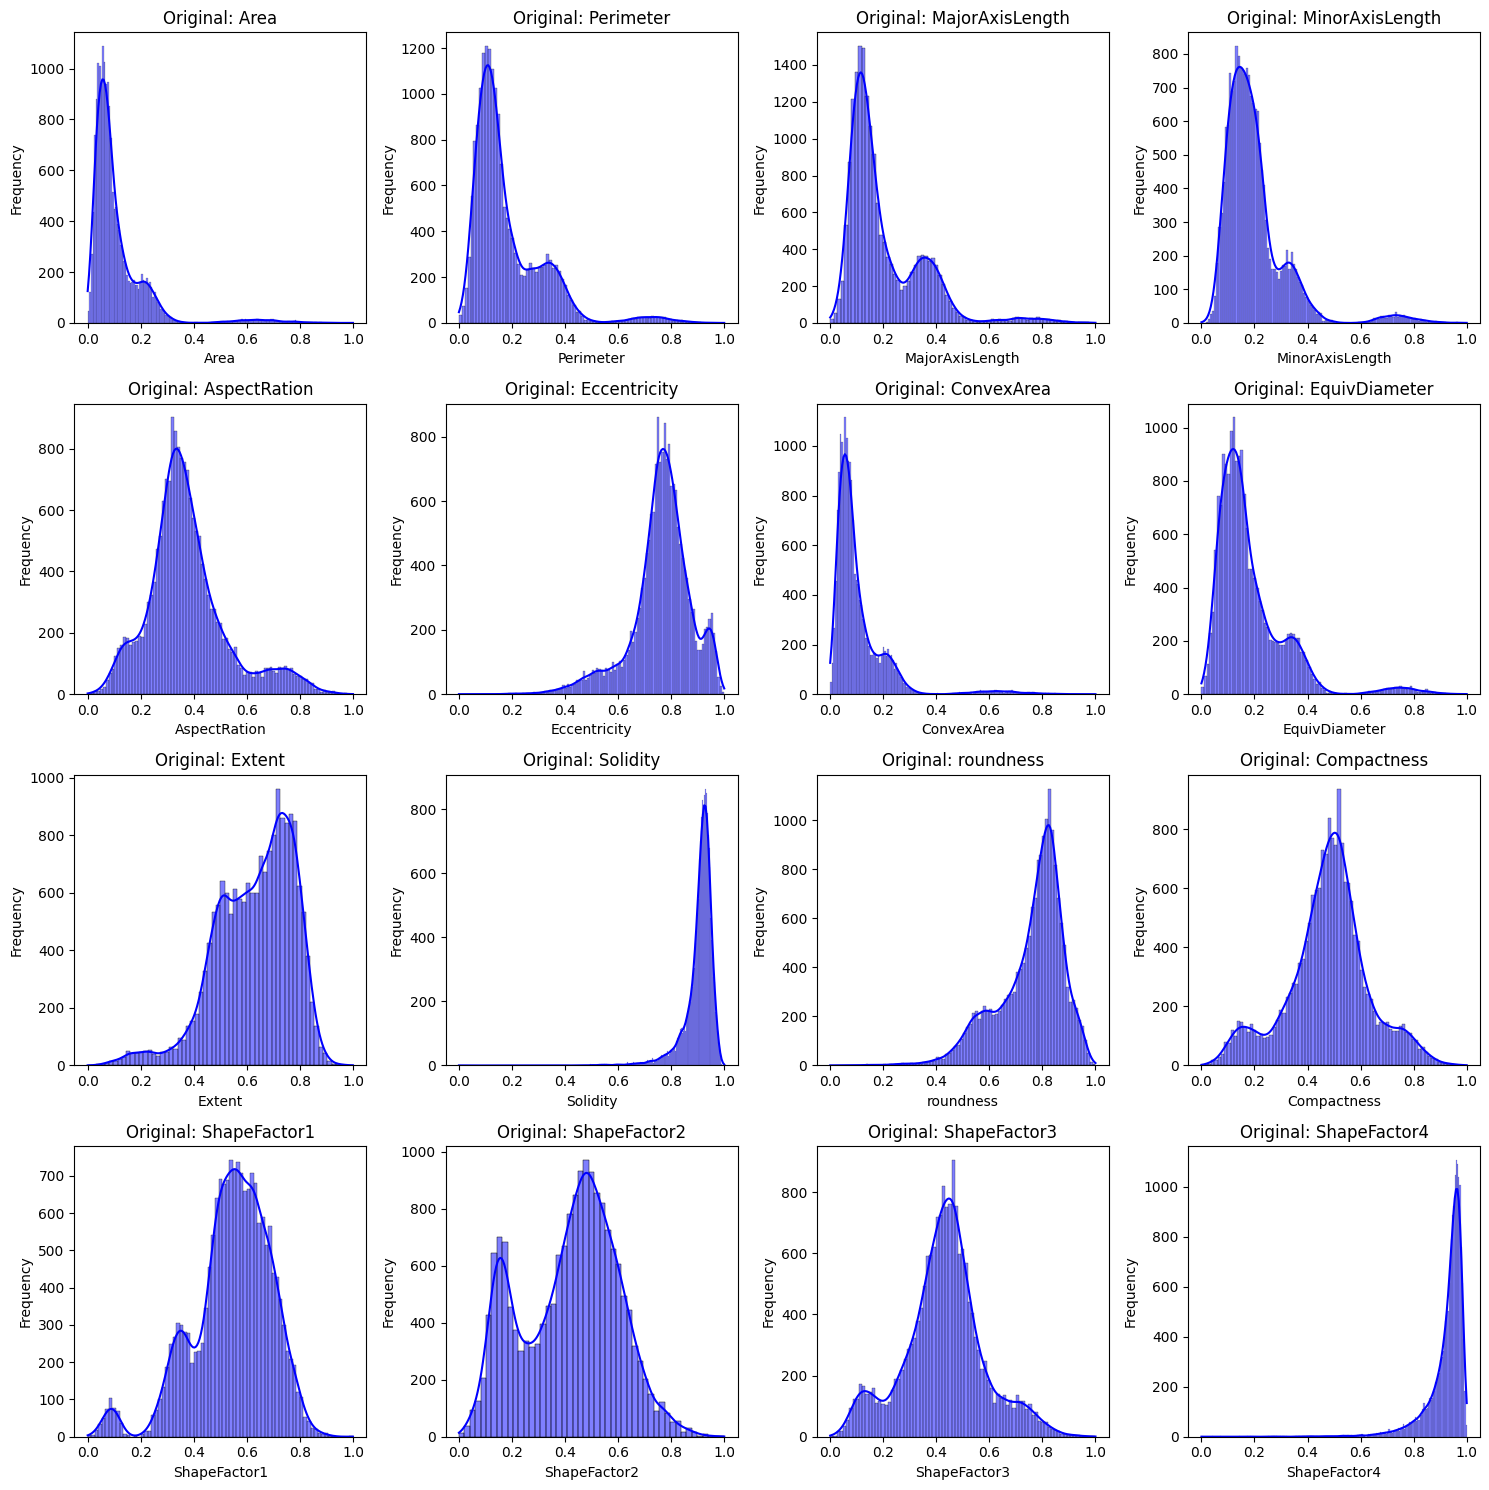

In [49]:
#Smote and Randomly undersample the training data
#plot the new  data distribution to check it out
X_train_MM_SR, y_train_SR= Smote_and_RandUndS(X_train_MM, y_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM_SR.columns):
    sns.histplot(X_train_MM_SR[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Build model and evaluate

In [50]:
#initialize the model
lr_MM_SR = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_MM_SR.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_SR= lr_MM_SR.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146



Mixed bag, more exploration is needed.

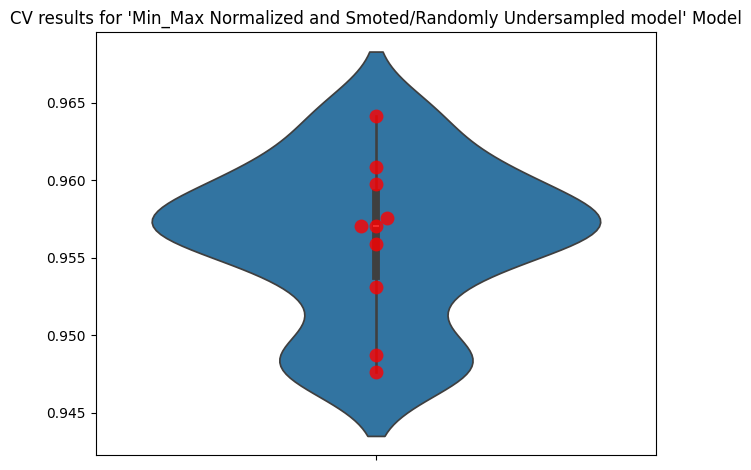

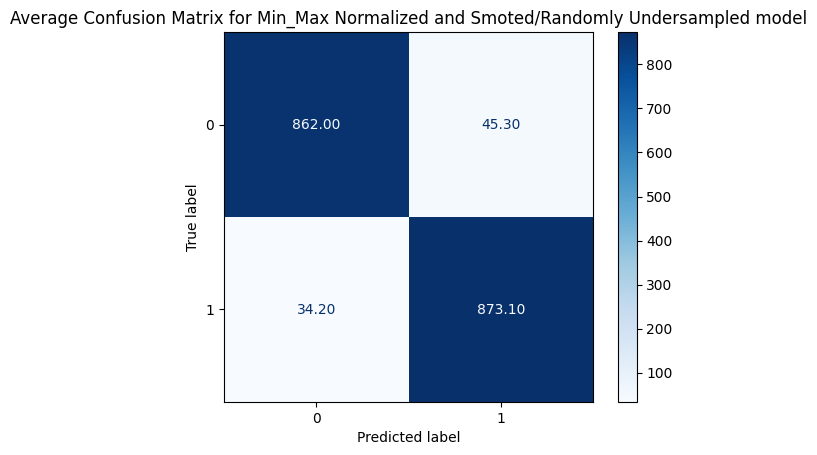

CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
CV results for Min_Max Normalized and Smoted/Randomly Undersampled model model: 0.95619 +- 0.00490 accuracy
Average specificity: 0.95007


In [51]:
#instantiate the class
lr_MM_SR_model_results= ModelWithCV(model= lr_MM_SR,
                                    model_name= 'Min_Max Normalized and Smoted/Randomly Undersampled model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= lr_MM_SR_model_results.plot_cv(ax)
plt.tight_layout()

ax2= lr_MM_SR_model_results.plot_avg_conf_matrix()


MM_Norm_model_results.print_cv_summary()
lr_MM_SR_model_results.print_cv_summary()

Both accuracy and specificity decreased, but the class imbalance was fixed. We will keep this option around for the moment and see which of the models hyper parameter tuning works better on. 

Even though Smoteing and random undersampling bring the instances of Dermason beans closer to the instance counts of non-Dermason beans, it seems that this does not improve the model results in the metrics that we care most about (specificity). I am not going to fully ditch this yet, because hyperparameter tuning may or may not work better with this.

# hpyer parameter tuning by iterating through C

## tune the min max normalized and Smote/randomly undersampled model

In [64]:
C_param_range= [.001, 0.01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000, 10000000000, 100000000000,
                1000000000000, 10000000000000, 100000000000000, 1000000000000000,
                10000000000000000, 100000000000000000, 1000000000000000000]

int_fit= [True, False]

for n1, int in enumerate(int_fit):
    for n2, c in enumerate(C_param_range):
        lr_MM_SR_Cs = LogisticRegression(fit_intercept=int, C=c, solver='liblinear',
                                penalty='l2', random_state=24)
        #fit
        lr_MM_SR_Cs.fit(X_train_MM_SR, y_train_SR)
        #make predictions with the model
        y_pred_lr_MM_SC_Cs= lr_MM_SR_Cs.predict(X_train_MM_SR)

        lr_MM_SR_Cs_model_results= ModelWithCV(model= lr_MM_SR_Cs,
                                    model_name= f'int:{int}, Min_Max Normalized and Smoted/Randomly Undersampled C{c} model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
    
        lr_MM_SR_Cs_model_results.print_cv_summary()

CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.001 model model: 0.85049 +- 0.01083 accuracy
Average specificity: 0.70407
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.01 model model: 0.89965 +- 0.00849 accuracy
Average specificity: 0.81671
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.1 model model: 0.93657 +- 0.00769 accuracy
Average specificity: 0.91976
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C1 model model: 0.94897 +- 0.00667 accuracy
Average specificity: 0.94236
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C10 model model: 0.95487 +- 0.00643 accuracy
Average specificity: 0.94820
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C100 model model: 0.95624 +- 0.00522 accuracy
Average specificity: 0.95084
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C1000 model

Current best it int= True, C= 100000000000

try tuning penalty

In [79]:
C_param_range= [10000000000, 100000000000,
                1000000000000]

int_fit= [True]

pens= ['l2']

solvers= ['liblinear', 'saga', 'lbfgs']

for n3, solvern in enumerate(solvers):
    for n1, int in enumerate(int_fit):
        for n2, c in enumerate(C_param_range):
            lr_MM_SR_Cs = LogisticRegression(fit_intercept=int, C=c, solver= solvern,
                                             random_state=24, max_iter= 10000)
            #fit
            lr_MM_SR_Cs.fit(X_train_MM_SR, y_train_SR)
            #make predictions with the model
            y_pred_lr_MM_SC_Cs= lr_MM_SR_Cs.predict(X_train_MM_SR)

            lr_MM_SR_Cs_model_results= ModelWithCV(model= lr_MM_SR_Cs,
                                    model_name= f'solver:{solvern}, int:{int}, MMN and S/RU, C{c} model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
    
            lr_MM_SR_Cs_model_results.print_cv_summary()
    

CV results for solver:liblinear, int:True, MMN and S/RU, C10000000000 model model: 0.95635 +- 0.00506 accuracy
Average specificity: 0.95040
CV results for solver:liblinear, int:True, MMN and S/RU, C100000000000 model model: 0.95663 +- 0.00504 accuracy
Average specificity: 0.95095
CV results for solver:liblinear, int:True, MMN and S/RU, C1000000000000 model model: 0.95696 +- 0.00527 accuracy
Average specificity: 0.95029
CV results for solver:saga, int:True, MMN and S/RU, C10000000000 model model: 0.95597 +- 0.00514 accuracy
Average specificity: 0.95062
CV results for solver:saga, int:True, MMN and S/RU, C100000000000 model model: 0.95597 +- 0.00514 accuracy
Average specificity: 0.95062
CV results for solver:saga, int:True, MMN and S/RU, C1000000000000 model model: 0.95597 +- 0.00514 accuracy
Average specificity: 0.95062
CV results for solver:lbfgs, int:True, MMN and S/RU, C10000000000 model model: 0.95757 +- 0.00558 accuracy
Average specificity: 0.94963
CV results for solver:lbfgs, int:

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


KeyboardInterrupt: 

It seems for the Min Max normalized and Smote randomly undersampled model the best hyper parameters are solver= liblinear, fit_intercept = True, and C=100,000,000,000.

In [81]:
#initialize the model
lr_MM_SR_tuned = LogisticRegression(fit_intercept=True, random_state= 24, C=100000000000, penalty='l2', solver='liblinear')
#fit the model
lr_MM_SR_tuned.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_SR_tuned= lr_MM_SR_tuned.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR_tuned))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146



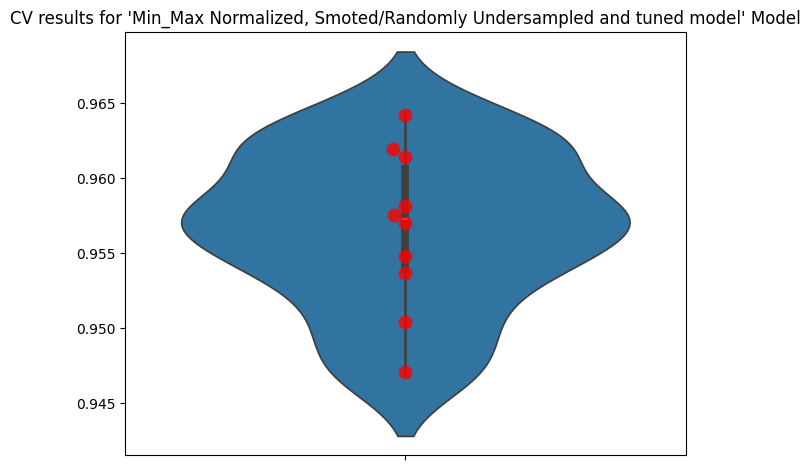

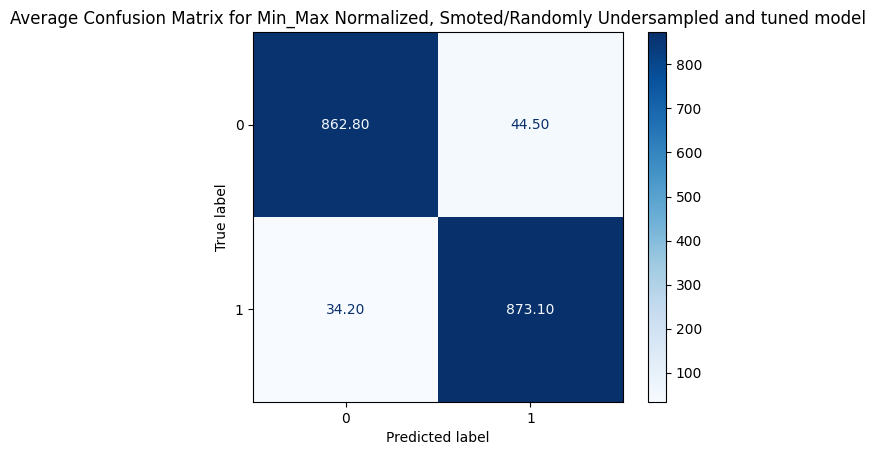

CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
CV results for Min_Max Normalized and Smoted/Randomly Undersampled model model: 0.95619 +- 0.00490 accuracy
Average specificity: 0.95007
CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95663 +- 0.00504 accuracy
Average specificity: 0.95095


In [82]:
#instantiate the class
lr_MM_SR_tuned_model_results= ModelWithCV(model= lr_MM_SR_tuned,
                                    model_name= 'Min_Max Normalized, Smoted/Randomly Undersampled and tuned model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= lr_MM_SR_tuned_model_results.plot_cv(ax)
plt.tight_layout()

ax2= lr_MM_SR_tuned_model_results.plot_avg_conf_matrix()


MM_Norm_model_results.print_cv_summary()
lr_MM_SR_model_results.print_cv_summary()
lr_MM_SR_tuned_model_results.print_cv_summary()

although the tuned version of this model outperforms the untuned version, it still does not perform better than the min max normalized model that did not use smote or random undersampling. Due to this, lets go back and tune the hyper parameters of the min max normalized model that did not use smote or random undersampling.

## Tune the hyper parameters of the min max normalized model

In [83]:
C_param_range= [.001, 0.01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000, 10000000000, 100000000000,
                1000000000000, 10000000000000, 100000000000000, 1000000000000000,
                10000000000000000, 100000000000000000, 1000000000000000000]

int_fit= [True, False]

for n1, int in enumerate(int_fit):
    for n2, c in enumerate(C_param_range):
        lr_MM_Cs = LogisticRegression(fit_intercept=int, C=c, solver='liblinear',
                                penalty='l2', random_state=24)
        #fit
        lr_MM_Cs.fit(X_train_MM, y_train)
        #make predictions with the model
        y_pred_lr_MM_Cs= lr_MM_Cs.predict(X_train_MM)

        lr_MM_Cs_model_results= ModelWithCV(model= lr_MM_Cs,
                                    model_name= f'int:{int}, Min_Max Normalized and Smoted/Randomly Undersampled C{c} model',
                                    X= X_train_MM,
                                    y= y_train)
    
        lr_MM_Cs_model_results.print_cv_summary()

CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.001 model model: 0.74071 +- 0.00038 accuracy
Average specificity: 1.00000
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.01 model model: 0.84880 +- 0.00903 accuracy
Average specificity: 0.99868
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.1 model model: 0.93216 +- 0.00599 accuracy
Average specificity: 0.98523
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C1 model model: 0.94669 +- 0.00479 accuracy
Average specificity: 0.97686
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C10 model model: 0.95322 +- 0.00386 accuracy
Average specificity: 0.97487
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C100 model model: 0.95559 +- 0.00339 accuracy
Average specificity: 0.97399
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C1000 model

In [ ]:
#instantiate the class
MM_Norm_model_results= ModelWithCV(model= lr_MM,
                                    model_name= 'Min_Max_Normalized_LR_Model',
                                    X= X_train_MM,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= MM_Norm_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()
MM_Norm_model_results.print_cv_summary()

## Hyper parameter tuning via Grid Search with Cross Validation

### tune for specificity on the smote and balanced set

In [60]:
#create a logistic regression grid for the grid search to iterate through
param_grid= {
    'penalty': ['l1', 'l2'],
    'C':[1e13, 1e16, 1e19],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'max_iter': [100, 1000, 2500, 5000, 10000000]
    }

#calculates specificity
def specificity(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    return TN / (TN + FP) if (TN + FP) != 0 else 0

#define specificity as a usable scoring parameter for Grid search
def specificity_scorer(estimator, X, y):
    y_pred = estimator.predict(X) 
    return specificity(y, y_pred)

log_reg= LogisticRegression(random_state= 24, C=1e16)

lr_cv_gs= GridSearchCV(estimator= log_reg,
                       param_grid= param_grid,
                       scoring= specificity_scorer, 
                       cv= 5,
                       verbose=1,
                       n_jobs=-1,
                      )

lr_cv_gs_bf= lr_cv_gs.fit(X_train_MM_SR, y_train_SR)
lr_cv_gs_bf.best_estimator_
    
    
    

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converg

KeyboardInterrupt: 

In [54]:
lr_cv_gs_bf.best_estimator_

LogisticRegression(C=1e+16, fit_intercept=False, random_state=24,
                   solver='newton-cg')

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

# Seveth model: Using min max scaler and grid_lr_MM_SR grid search specification reccomendations

## build model and evaluate

In [56]:
#initialize the model
lr_MM_GS1 = LogisticRegression(C=1e16, fit_intercept=False, penalty='l2', random_state=24,
                   solver='newton-cg')
#fit the model
lr_MM_GS1.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_GS1= lr_MM_GS1.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR))
print()
print('Min_Max Normalized and Grid Search 1 model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_GS1))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146


Min_Max Normalized and Grid Search 1 model classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9073
           1       0.95 

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converg

In [57]:
#lets compare this new model's cross validation scores to the previous models
MM_GS1_cv_results = cross_val_score(lr_MM_GS1, X_train_MM_SR, y_train_SR, cv= 6)

print('An array of Min Max normalized model accuracy results across (6) cross Validations (previous best):')
print(MM_cv_results)
print('An array of Min Max normalized and then Smoted/Randomly Undersampled accuracy results across (6) cross Validations:')
print(MM_SR_cv_results)
print('An array of Min Max normalized and then Grid Search 1 model accuracy results across (6) cross Validations:')
print(MM_GS1_cv_results)

print()

print('The average accuracy score of those 6 Min Max Normalized cross-validations (previous best):')
print(MM_cv_results.mean())
print('The average accuracy score of those 6 Min Max Normalized then Smoted/Randomly Undersampled cross-validations:')
print(MM_SR_cv_results.mean())
print('The average accuracy score of those 6 Min Max Normalized then Grid Search 1 cross-validations:')
print(MM_GS1_cv_results.mean())

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search al

An array of Min Max normalized model accuracy results across (6) cross Validations (previous best):
[0.95151812 0.95592556 0.96033301 0.95688388 0.95541401 0.9588437 ]
An array of Min Max normalized and then Smoted/Randomly Undersampled accuracy results across (6) cross Validations:
[0.96132231 0.95735537 0.95965608 0.95171958 0.94973545 0.95701058]
An array of Min Max normalized and then Grid Search 1 model accuracy results across (6) cross Validations:
[0.95966942 0.49983471 0.96031746 0.95535714 0.95469577 0.96130952]

The average accuracy score of those 6 Min Max Normalized cross-validations (previous best):
0.9564863811293876
The average accuracy score of those 6 Min Max Normalized then Smoted/Randomly Undersampled cross-validations:
0.9561332298453511
The average accuracy score of those 6 Min Max Normalized then Grid Search 1 cross-validations:
0.8818640044018832


/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warning

CV results for MM_LR_Model model: 0.95689 +- 0.00391 accuracy
CV results for MM_SR_LR_Model model: 0.95619 +- 0.00490 accuracy
CV results for MM_GS1_LR_Model model: 0.77512 +- 0.22474 accuracy


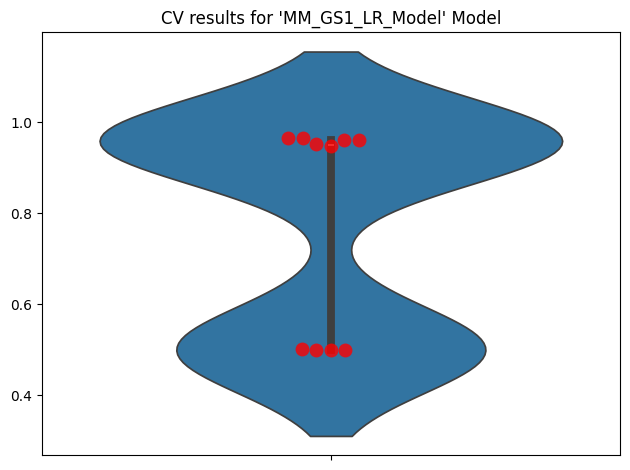

In [58]:
#instantiate the class
MM_GS1_model_results= ModelWithCV(model= lr_MM_GS1,
                                    model_name= 'MM_GS1_LR_Model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)

#plot the results
fig, ax= plt.subplots()

ax= MM_GS1_model_results.plot_cv(ax)
plt.tight_layout()

MM_model_results.print_cv_summary()
MM_SR_model_results.print_cv_summary()
MM_GS1_model_results.print_cv_summary()

Confusion Matrix


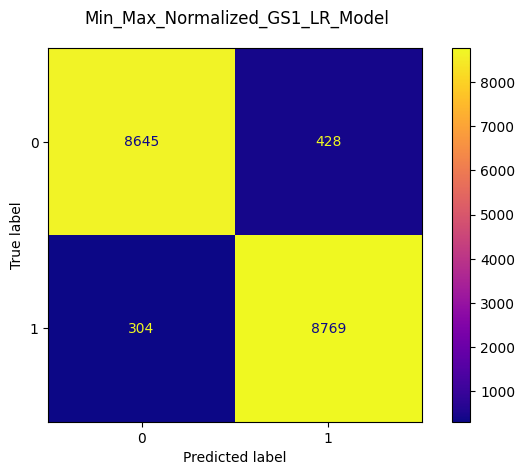

[[8645  428]
 [ 304 8769]]
Min Max Normalized Specificity (Previous Best):0.9742091921084537
Min Max Normalized Smoted and Randomly Undersampled Specificity:0.9500716411330321
Min Max Normalized GS1 Specificity:0.9528270693265734


In [59]:
#plot the confusion matrix for this model
fig, ax = plt.subplots()
fig.suptitle('Min_Max_Normalized_GS1_LR_Model')

cm_display= ConfusionMatrixDisplay.from_estimator(estimator= lr_MM_GS1, 
                                                  X= X_train_MM_SR,
                                                  y= y_train_SR, 
                                                  cmap= 'plasma',
                                                  ax= ax)
#print out the raw matrix numbers
MM_GS1_lr_matrix= confusion_matrix(y_train_SR, lr_MM_GS1.predict(X_train_MM_SR))
print('Confusion Matrix')

plt.tight_layout()
plt.show()

#calculate specificity
TN = MM_GS1_lr_matrix[0][0]  # First row, first column
FP = MM_GS1_lr_matrix[0][1]
MM_GS1_specificity = TN / (TN + FP)
print(MM_GS1_lr_matrix)
print(f'Min Max Normalized Specificity (Previous Best):{MM_specificity}')
print(f'Min Max Normalized Smoted and Randomly Undersampled Specificity:{MM_SR_specificity}')
print(f'Min Max Normalized GS1 Specificity:{MM_GS1_specificity}')

### try tuning for accuracy

In [ ]:
#create a logistic regression grid for the grid search to iterate through
grid_lr_MM_2= {
    'penalty': ['l1', 'l2'],
    'C':np.logspace(-6,20,4),
    'tol': np.logspace(-5,5,4),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
    }

lr_cv_gs2= GridSearchCV(estimator= LogisticRegression(fit_intercept=False, random_state= 24),
                       param_grid= grid_lr_MM_2, scoring= 'accuracy', cv= 5)

lr_cv_gs_bf2= lr_cv_gs2.fit(X_train_MM, y_train)
lr_cv_gs_bf2.best_estimator_

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not c

In [ ]:
lr_cv_gs_bf2.best_estimator_

In [71]:
"(C=0.001, fit_intercept=False, penalty='l1', random_state=24,solver='liblinear')"=="(C=0.001, fit_intercept=False, penalty='l1', random_state=24,solver='liblinear')"

True

In [75]:
#create a logistic regression grid for the grid search to iterate through
param_grid= {
    'penalty': ['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear','saga'],
    'fit_intercept': [True, False],
    'max_iter': [100, 1000, 2500, 5000]
    }

#calculates specificity
def specificity(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    return TN / (TN + FP) if (TN + FP) != 0 else 0

#define specificity as a usable scoring parameter for Grid search
def specificity_scorer(estimator, X, y):
    y_pred = estimator.predict(X) 
    return specificity(y, y_pred)

log_reg= LogisticRegression(random_state= 24)

lr_cv_gs= GridSearchCV(estimator= log_reg,
                       param_grid= param_grid,
                       scoring= specificity_scorer, 
                       cv= 5,
                       verbose=1,
                       n_jobs=-1,
                      )

lr_cv_gs_bf= lr_cv_gs.fit(X_train_MM, y_train)
lr_cv_gs_bf.best_estimator_
    
    

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


LogisticRegression(C=0.001, penalty='l1', random_state=24, solver='liblinear')

In [77]:
#initialize the model
lr_MM_GS2 = LogisticRegression(C=0.001, penalty='l1', random_state=24, solver='liblinear')
#fit the model
lr_MM_GS2.fit(X_train_MM, y_train)
#make predictions with the model
y_pred_lr_MM_GS2= lr_MM_GS2.predict(X_train_MM)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR))
print()
print('Min_Max Normalized and Grid Search 1 model classification report:')
print(classification_report(y_train, y_pred_lr_MM_GS2))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146


Min_Max Normalized and Grid Search 1 model classification report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      9073
           1       0.00 

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [76]:
#create a logistic regression grid for the grid search to iterate through
param_grid= {
    'penalty': ['l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'max_iter': [100, 1000, 2500, 5000]
    }

#calculates specificity
def specificity(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    return TN / (TN + FP) if (TN + FP) != 0 else 0

#define specificity as a usable scoring parameter for Grid search
def specificity_scorer(estimator, X, y):
    y_pred = estimator.predict(X) 
    return specificity(y, y_pred)

log_reg= LogisticRegression(random_state= 24)

lr_cv_gs= GridSearchCV(estimator= log_reg,
                       param_grid= param_grid,
                       scoring= specificity_scorer, 
                       cv= 5,
                       verbose=1,
                       n_jobs=-1,
                      )

lr_cv_gs_bf= lr_cv_gs.fit(X_train_MM, y_train)
lr_cv_gs_bf.best_estimator_
    


Fitting 5 folds for each of 280 candidates, totalling 1400 fits


LogisticRegression(C=0.001, random_state=24, solver='newton-cg')

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Sample dataset (replace with your own data)
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Binary classification target
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define X (features) and y (target)
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (RandomForest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_predict = model.predict(X_test)

# Print classification report comparing true labels (y_test) with predicted labels (y_predict)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



# inspect the training data

In [10]:
#Check for high levels or correlation among the X_train data.
#Anything above 0.8 could be problematic for model classification
X_train.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966993         0.932142         0.952206   
Perimeter        0.966993   1.000000         0.977515         0.914137   
MajorAxisLength  0.932142   0.977515         1.000000         0.827543   
MinorAxisLength  0.952206   0.914137         0.827543         1.000000   
AspectRation     0.240248   0.383606         0.548434        -0.008816   
Eccentricity     0.266727   0.390148         0.540704         0.020667   
ConvexArea       0.999940   0.967946         0.932905         0.951957   
EquivDiameter    0.985046   0.991527         0.962013         0.949056   
Extent           0.056011  -0.019421        -0.076725         0.147341   
Solidity        -0.193281  -0.299955        -0.280830        -0.153526   
roundness       -0.355742  -0.545221        -0.594614        -0.209613   
Compactness     -0.266932  -0.405570        -0.566825        -0.015784   
ShapeFactor1    -0.848516  -0.865438        -0.774986        -0.947031   
ShapeFactor2    -0.638820  -0.767014        -0.858583        -0.472263   
ShapeFactor3    -0.271117  -0.407261        -0.566731        -0.020151   
ShapeFactor4    -0.356649  -0.430223        -0.483104        -0.266080   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.240248      0.266727    0.999940       0.985046   
Perimeter            0.383606      0.390148    0.967946       0.991527   
MajorAxisLength      0.548434      0.540704    0.932905       0.962013   
MinorAxisLength     -0.008816      0.020667    0.951957       0.949056   
AspectRation         1.000000      0.923920    0.241791       0.302427   
Eccentricity         0.923920      1.000000    0.268482       0.318165   
ConvexArea           0.241791      0.268482    1.000000       0.985306   
EquivDiameter        0.302427      0.318165    0.985306       1.000000   
Extent              -0.371077     -0.320043    0.054282       0.029835   
Solidity            -0.265588     -0.296318   -0.202829      -0.228500   
roundness           -0.767329     -0.722651   -0.360244      -0.434310   
Compactness         -0.987634     -0.970137   -0.268765      -0.326798   
ShapeFactor1         0.024154      0.018822   -0.848524      -0.893128   
ShapeFactor2        -0.837387     -0.860030   -0.640382      -0.712711   
ShapeFactor3        -0.978507     -0.980923   -0.272975      -0.329643   
ShapeFactor4        -0.447964     -0.448444   -0.362946      -0.393800   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.056011 -0.193281  -0.355742    -0.266932     -0.848516   
Perimeter       -0.019421 -0.299955  -0.545221    -0.405570     -0.865438   
MajorAxisLength -0.076725 -0.280830  -0.594614    -0.566825     -0.774986   
MinorAxisLength  0.147341 -0.153526  -0.209613    -0.015784     -0.947031   
AspectRation    -0.371077 -0.265588  -0.767329    -0.987634      0.024154   
Eccentricity    -0.320043 -0.296318  -0.722651    -0.970137      0.018822   
ConvexArea       0.054282 -0.202829  -0.360244    -0.268765     -0.848524   
EquivDiameter    0.029835 -0.228500  -0.434310    -0.326798     -0.893128   
Extent           1.000000  0.186955   0.345184     0.355027     -0.142172   
Solidity         0.186955  1.000000   0.604263     0.302002      0.151795   
roundness        0.345184  0.604263   1.000000     0.768542      0.229909   
Compactness      0.355027  0.302002   0.768542     1.000000     -0.008590   
ShapeFactor1    -0.142172  0.151795   0.229909    -0.008590      1.000000   
ShapeFactor2     0.238002  0.341279   0.782639     0.868742      0.470277   
ShapeFactor3     0.348436  0.306037   0.763606     0.998682     -0.007422   
ShapeFactor4     0.144614  0.702385   0.471317     0.483360      0.251583   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.638820     -0.271117     -0.356649  
Perimeter           -0.767014     -0.407261     -0.430223  
MajorAxisLeng

here we can see that there is a lot of high correlation betweeen the dimensionaql variables. this can potentially ve a problem for predictive models given the following

In [11]:
#logistic regression
"""
Unstable coefficient estimates: When variables are highly correlated, 
the model can have trouble determining the individual contribution of each feature. 
This can make the model's coefficients unstable, and they might change drastically 
with small changes in the data.

Overfitting: If you have many correlated variables, logistic regression might start 
to overfit, where it memorizes the noise in the data rather than learning the 
underlying patterns.

"""

#possible fixs are:
"""
Use variance inflation factor (VIF): A high VIF indicates high multicollinearity. 
If VIF is high for some variables, you might want to remove or combine them.

Principal Component Analysis (PCA): PCA can reduce the dimensionality of your feature
set while retaining as much variance as possible, which could be helpful if you're 
working with correlated features.

"""

"\nUse variance inflation factor (VIF): A high VIF indicates high multicollinearity. \nIf VIF is high for some variables, you might want to remove or combine them.\n\nPrincipal Component Analysis (PCA): PCA can reduce the dimensionality of your feature\nset while retaining as much variance as possible, which could be helpful if you're \nworking with correlated features.\n\n"

In [12]:
#Decision trees

"""
not so sensitive to high correlation and handles it pretty well.

if there is still too much multi-colinearity then pruning a tree or setting a depth 
limit can still help. So can Random Forests or Gradient Boosting. 

"""

'\nnot so sensitive to high correlation and handles it pretty well.\n\nif there is still too much multi-colinearity then pruning a tree or setting a depth \nlimit can still help. So can Random Forests or Gradient Boosting. \n\n'

Here we will check out the data distrobution to see what is normal and what is skewed.

A fair amount of this data does not have a normal distrobution and is either left or right skewed, which can be problematic with machine learning. 

In [14]:
#if the data is right skewed use a log transformation.
#if it is slightly right skewed use a square root transformation
#if that fails use an exponential transformation

#if the data is left skewed you can use reciprocal transformation 
#can also use square or cube root transformation



make a function to redistribute skewed data

In [15]:


#list of columns to transform and the redistribution methods

#columns to log transform
LogT=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
      'EquivDiameter', 'ShapeFactor2']

#columns to Box-Cox transform
BoxCoxT= ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

#create a function to transform the columns in a data frame accordingly, or not
def TransShift(df):
    
    Redist= pd.DataFrame()
    
    for col in df.columns:
        if col in LogT:
            Redist[col]= np.log(df[col])
        elif col in BoxCoxT:
            Redist[col], _ = stats.boxcox(df[col] + 1)
        else:
            Redist[col]= df[col]
    
    return Redist


/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


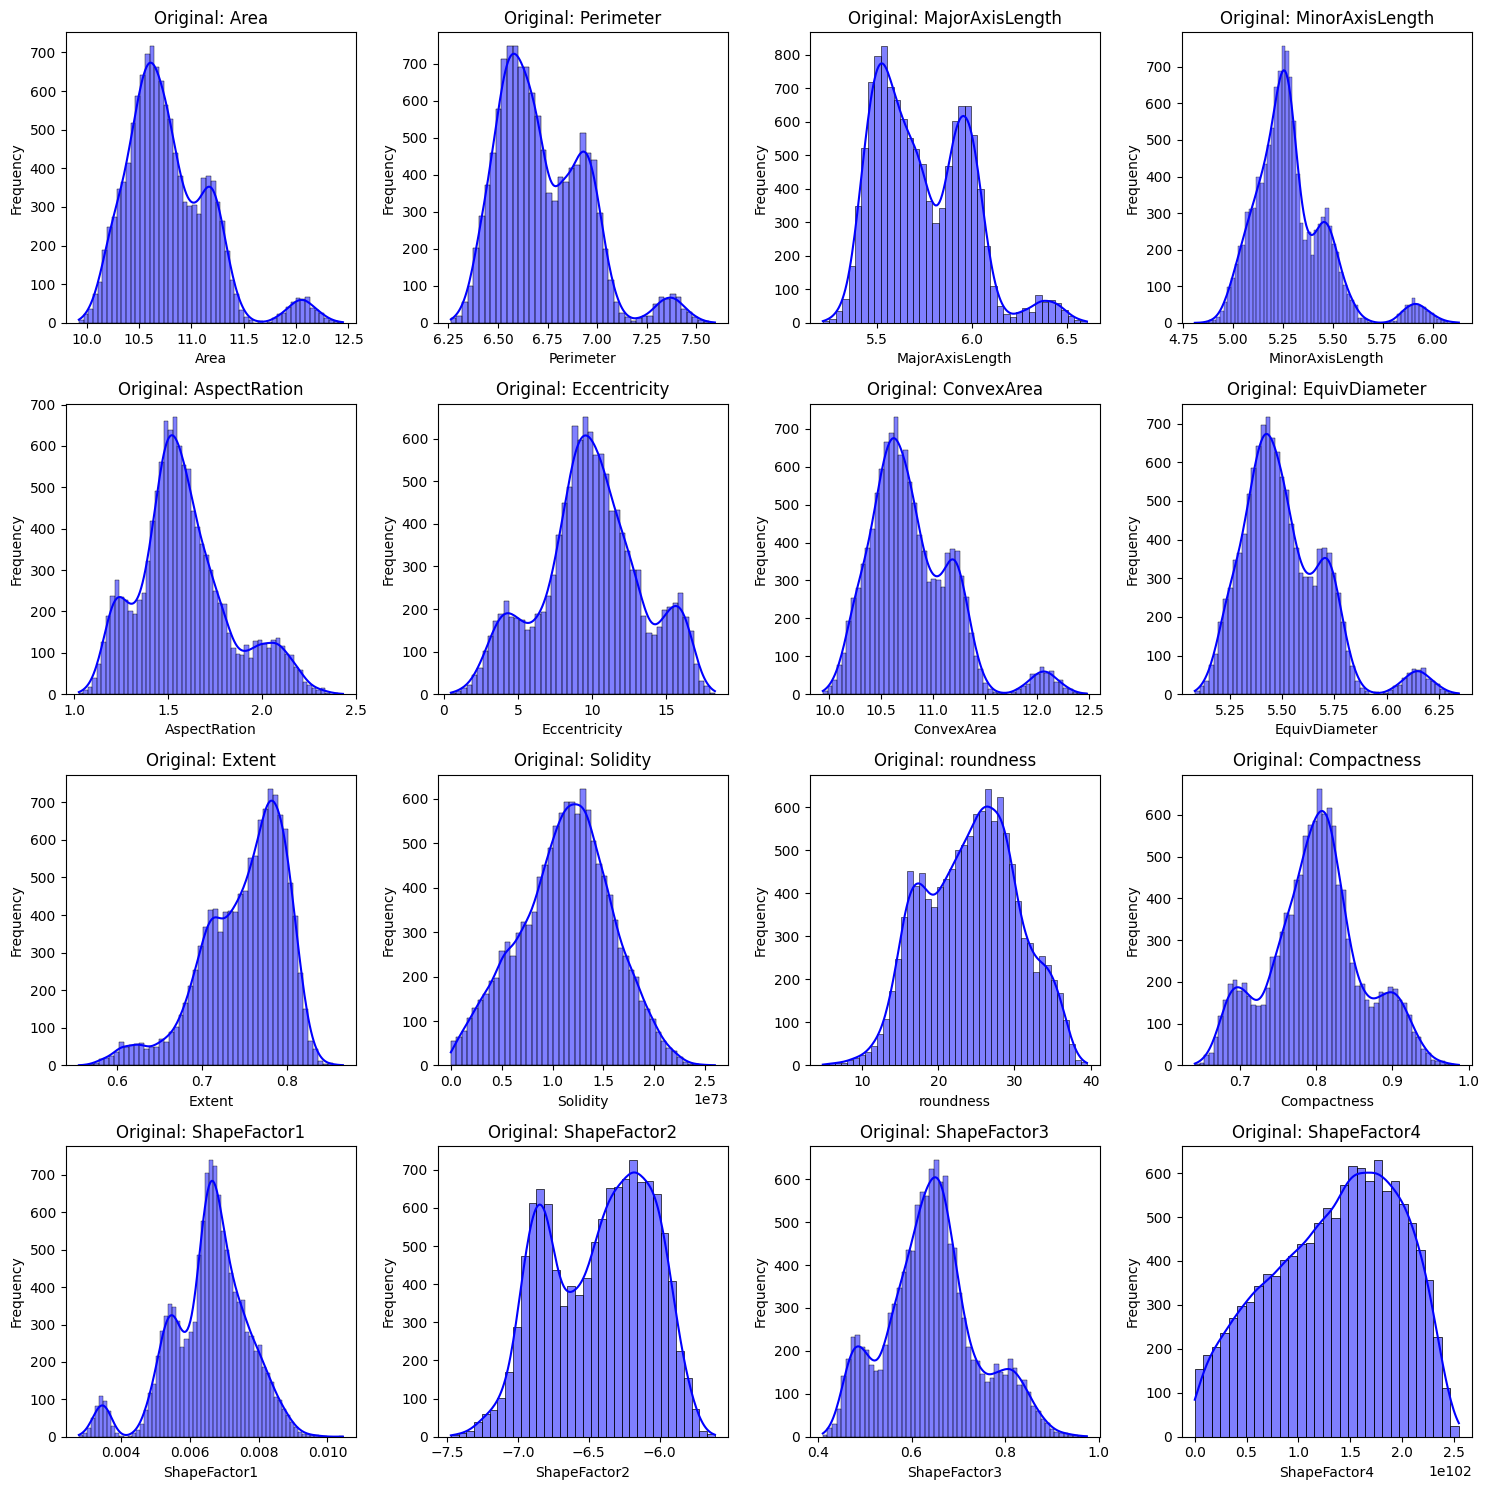

In [16]:
#plot the new normalized data distribution to check it out
X_train_TransShift= TransShift(X_train)

#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
axes = axes.flatten()

#Plot the original data
for i, col in enumerate(X_train_TransShift.columns):
    sns.histplot(X_train_TransShift[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()